In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.preprocessing import PowerTransformer, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import SelectKBest, f_regression, chi2

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, roc_curve, classification_report, plot_roc_curve



In [2]:
pd.set_option("display.max_columns", None)
data = pd.read_csv("data/data.csv")
data = data.drop(["Unnamed: 32"], axis=1)
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# Splitting Data into Train, Validation, and Test Sets

In [3]:
X = data.drop(["id", "diagnosis"], axis=1)
y = data["diagnosis"]
y = (y == "M").astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [5]:
X_train_val, X_val, y_train_val, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)

# Modelling

We would try different ml models such as: 

- KNN
- SVC
- Logistic Regression
- Decision Tree
- Random Forest
- Adaboosting
- XGBOSST
- Light GBM

## Create Model Evaluation Function

In [6]:
results = []

In [7]:
# ML evaluation function

def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(5, 3))
    group_names = ["TP", "FP", "FN", "TP"]
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_perc = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    label = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_perc)]
    label = np.asarray(label).reshape(2, 2)
    heatmap = sns.heatmap(cm, annot=label, annot_kws={'size': 12}, fmt='', cmap='YlGnBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='center', fontsize=10)
    plt.title('Confusion Matrix', fontsize=12, color='darkblue')
    plt.ylabel('True label', fontsize=10)
    plt.xlabel('Predicted label', fontsize=10)
    plt.show()

def plot_roc_curve(y_true, y_prob):
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_true, y_prob)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.figure(figsize=(5, 3))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='red', label='AUC = %0.2f' % roc_auc, linestyle="--")
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

def ml_evaluation(model, model_name, X, y, X_train = X_train_val, y_train = y_train_val, classes=None, results=None):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    cm = confusion_matrix(y, y_pred)
    
    if classes is None:
        classes = ['Class %d' % i for i in range(len(cm))]
    
    plot_confusion_matrix(cm, classes)
    
    print("Classification Report:")
    print(classification_report(y, y_pred, target_names=classes, digits=4))
    
    if len(classes) == 2:
        try:
            best_params = model.best_params_
        except AttributeError:
            best_params = None

        try:
            best_cross_val_score = model.best_score_
        except AttributeError:
            best_cross_val_score = None

        try:
            train_accuracy = model.score(X_train, y_train)
        except:
            train_accuracy = None
            
        accuracy = accuracy_score(y, y_pred)
        precision = precision_score(y, y_pred)
        recall = recall_score(y, y_pred)
        f1 = f1_score(y, y_pred)
        auc = roc_auc_score(y, y_prob)
        
        evaluation_metrics = {
            "model": model_name,
            "best_params": best_params,
            "best_cross_val_score": best_cross_val_score,
            "train_accuracy": train_accuracy, 
            "test_accuracy": accuracy,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "AUC": auc
        }
        
        print(evaluation_metrics)
        
        if results is not None:
            results.append(evaluation_metrics)
        
    plot_roc_curve(y, y_prob)    

In [8]:
def plot_learning_curve(model, X, y, cv=10, scoring='accuracy'):
    # Calculate learning curve
    train_sizes, train_scores, val_scores = learning_curve(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)

    # Calculate mean and standard deviation of training and validation scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.3)
    plt.plot(train_sizes, val_mean, label='Validation Accuracy')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.3)
    plt.xlabel('Training Set Size')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()


## SVC
### SVC without Transformer and PCA

In [9]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

svm = SVC(random_state=1, max_iter=500, probability=True)

param_grid_svm = {'svm__C': [10**i for i in range(-3, 4)],
                  'svm__gamma': [10**i for i in range(-3, 4)],
                  'svm__kernel': ['linear', 'rbf']
}

pipe_svm = Pipeline(steps=[('preprocessor', preprocessor),
                            ('svm', svm)])

gs_svm = GridSearchCV(estimator=pipe_svm,
                      param_grid=param_grid_svm,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_svm.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best SVM hyperparameters:", gs_svm.best_params_)
print("Best SVM accuracy:", gs_svm.best_score_)

# evaluate model on train_val set
print("SVM train accuracy:", gs_svm.score(X_train_val, y_train_val))

# evaluate model on val set
print("SVM test accuracy:", gs_svm.score(X_val, y_val))

Fitting 10 folds for each of 98 candidates, totalling 980 fits
Best SVM hyperparameters: {'svm__C': 1, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}
Best SVM accuracy: 0.978078078078078
SVM train accuracy: 0.9807692307692307
SVM test accuracy: 0.978021978021978


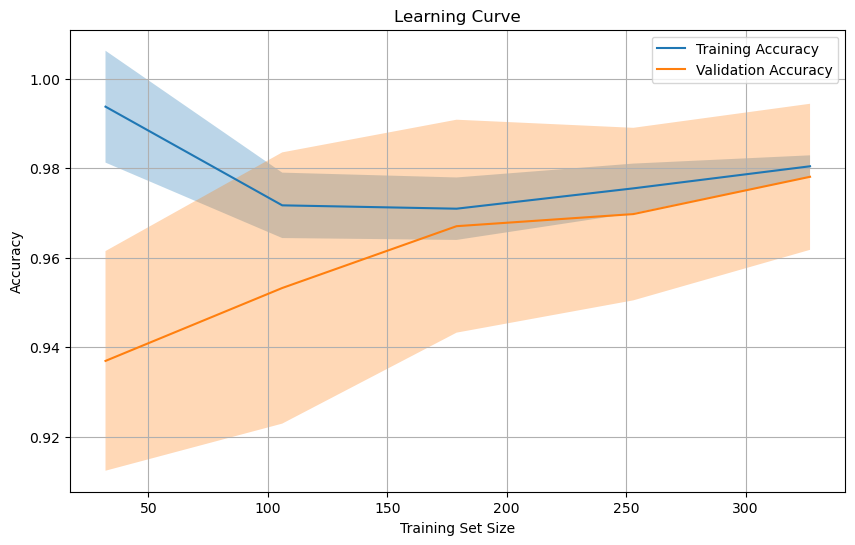

In [10]:
plot_learning_curve(gs_svm.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

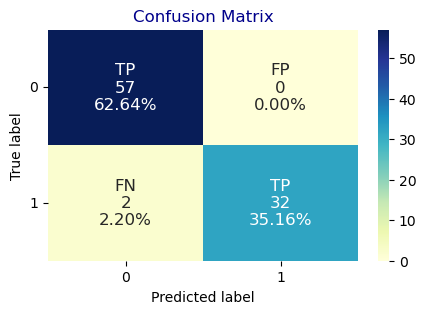

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9661    1.0000    0.9828        57
   Malignant     1.0000    0.9412    0.9697        34

    accuracy                         0.9780        91
   macro avg     0.9831    0.9706    0.9762        91
weighted avg     0.9788    0.9780    0.9779        91

{'model': 'Base SVC', 'best_params': {'svm__C': 1, 'svm__gamma': 0.001, 'svm__kernel': 'linear'}, 'best_cross_val_score': 0.978078078078078, 'train_accuracy': 0.9807692307692307, 'test_accuracy': 0.978021978021978, 'Precision': 1.0, 'Recall': 0.9411764705882353, 'F1-Score': 0.9696969696969697, 'AUC': 0.9860681114551084}


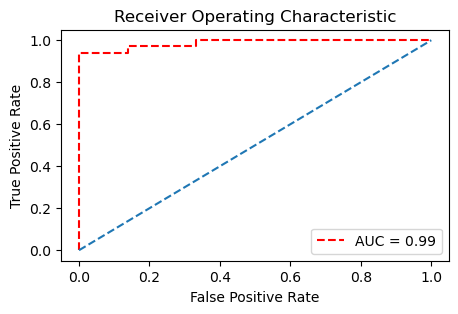

In [11]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_svm, "Base SVC", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### SVC With Transformer

In [12]:
numeric_features = list(range(len(X_train_val.columns.tolist())))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

svm = SVC(random_state=1, max_iter=500, probability=True)

param_grid_svm_tf = {'svm__C': [10**i for i in range(-3, 4)],
                  'svm__gamma': [10**i for i in range(-3, 4)],
                  'svm__kernel': ['linear', 'rbf']
}

pipe_svm_tf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('svm', svm)])

gs_svm_tf = GridSearchCV(estimator=pipe_svm_tf,
                      param_grid=param_grid_svm_tf,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_svm_tf.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best SVM hyperparameters:", gs_svm_tf.best_params_)
print("Best SVM accuracy:", gs_svm_tf.best_score_)

# evaluate model on train_val set
print("SVM train accuracy:", gs_svm_tf.score(X_train_val, y_train_val))

# evaluate model on val set
print("SVM test accuracy:", gs_svm_tf.score(X_val, y_val))


Fitting 10 folds for each of 98 candidates, totalling 980 fits
Best SVM hyperparameters: {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best SVM accuracy: 0.9861861861861861
SVM train accuracy: 0.9917582417582418
SVM test accuracy: 0.978021978021978


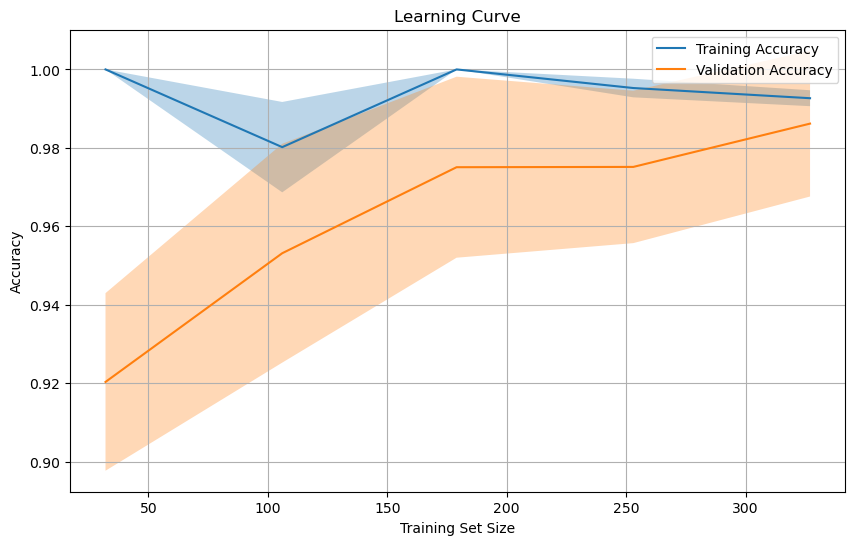

In [13]:
plot_learning_curve(gs_svm_tf.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

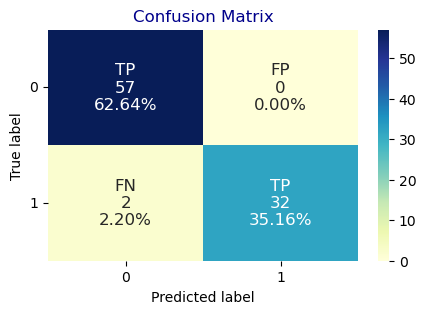

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9661    1.0000    0.9828        57
   Malignant     1.0000    0.9412    0.9697        34

    accuracy                         0.9780        91
   macro avg     0.9831    0.9706    0.9762        91
weighted avg     0.9788    0.9780    0.9779        91

{'model': 'SVC with Transformer', 'best_params': {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}, 'best_cross_val_score': 0.9861861861861861, 'train_accuracy': 0.9917582417582418, 'test_accuracy': 0.978021978021978, 'Precision': 1.0, 'Recall': 0.9411764705882353, 'F1-Score': 0.9696969696969697, 'AUC': 0.9958720330237357}


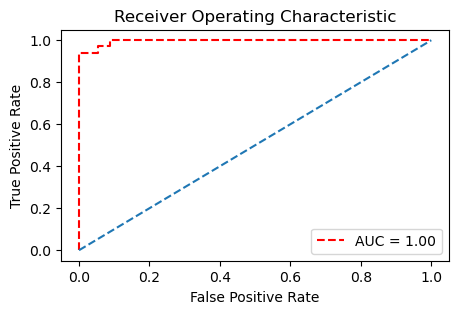

In [14]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_svm_tf, "SVC with Transformer", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### SVC with PCA

In [15]:
numeric_features = list(range(len(X_train_val.columns.tolist())))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=9)),
#     ('selector', SelectKBest(score_func=f_regression, k=10))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

svm = SVC(random_state=1, max_iter=500, probability=True)

param_grid_svm_pca = {'svm__C': [10**i for i in range(-3, 4)],
                  'svm__gamma': [10**i for i in range(-3, 4)],
                  'svm__kernel': ['linear', 'rbf']
}

pipe_svm_pca = Pipeline(steps=[('preprocessor', preprocessor),
                            ('svm', svm)])

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
                      param_grid=param_grid_svm_pca,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_svm_pca.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best SVM hyperparameters:", gs_svm_pca.best_params_)
print("Best SVM accuracy:", gs_svm_pca.best_score_)

# evaluate model on train_val set
print("SVM train accuracy:", gs_svm_pca.score(X_train_val, y_train_val))

# evaluate model on val set
print("SVM test accuracy:", gs_svm_pca.score(X_val, y_val))


Fitting 10 folds for each of 98 candidates, totalling 980 fits
Best SVM hyperparameters: {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best SVM accuracy: 0.9725225225225225
SVM train accuracy: 0.9917582417582418
SVM test accuracy: 0.978021978021978


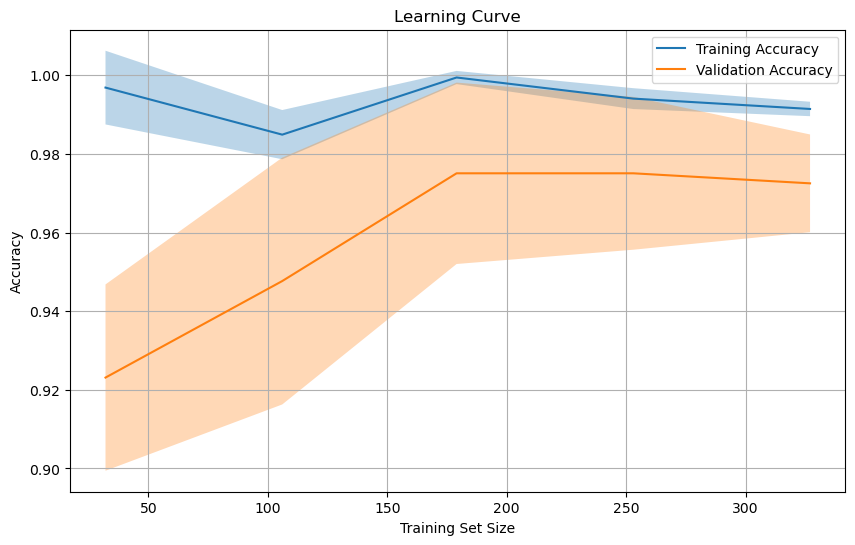

In [16]:
plot_learning_curve(gs_svm_pca.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

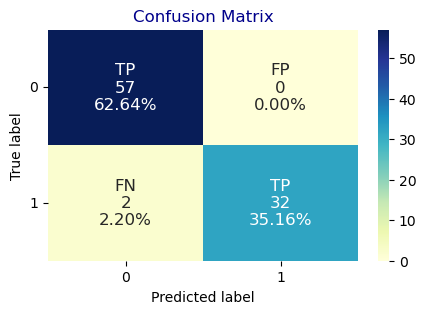

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9661    1.0000    0.9828        57
   Malignant     1.0000    0.9412    0.9697        34

    accuracy                         0.9780        91
   macro avg     0.9831    0.9706    0.9762        91
weighted avg     0.9788    0.9780    0.9779        91

{'model': 'SVC with PCA', 'best_params': {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'}, 'best_cross_val_score': 0.9725225225225225, 'train_accuracy': 0.9917582417582418, 'test_accuracy': 0.978021978021978, 'Precision': 1.0, 'Recall': 0.9411764705882353, 'F1-Score': 0.9696969696969697, 'AUC': 0.9948400412796697}


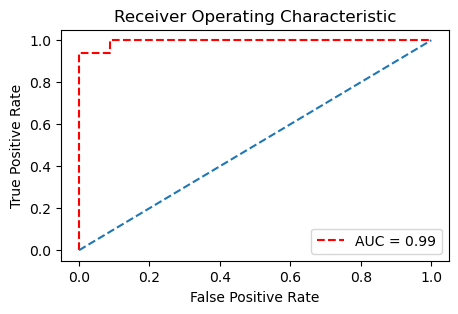

In [17]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_svm_pca, "SVC with PCA", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### SVC with Feature Selection

In [18]:
numeric_features = list(range(len(X_train_val.columns.tolist())))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler()),
#     ('pca', PCA(n_components=9)),
    ('selector', SelectKBest(score_func=f_regression, k=10))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

svm = SVC(random_state=1, max_iter=500, probability=True)

param_grid_svm_sel = {'svm__C': [10**i for i in range(-3, 4)],
                  'svm__gamma': [10**i for i in range(-3, 4)],
                  'svm__kernel': ['linear', 'rbf']
}

pipe_svm_sel = Pipeline(steps=[('preprocessor', preprocessor),
                            ('svm', svm)])

gs_svm_sel = GridSearchCV(estimator=pipe_svm_sel,
                      param_grid=param_grid_svm_sel,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_svm_sel.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best SVM hyperparameters:", gs_svm_sel.best_params_)
print("Best SVM accuracy:", gs_svm_sel.best_score_)

# evaluate model on train_val set
print("SVM train accuracy:", gs_svm_sel.score(X_train_val, y_train_val))

# evaluate model on val set
print("SVM test accuracy:", gs_svm_sel.score(X_val, y_val))


Fitting 10 folds for each of 98 candidates, totalling 980 fits
Best SVM hyperparameters: {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}
Best SVM accuracy: 0.9532282282282282
SVM train accuracy: 0.9505494505494505
SVM test accuracy: 0.967032967032967


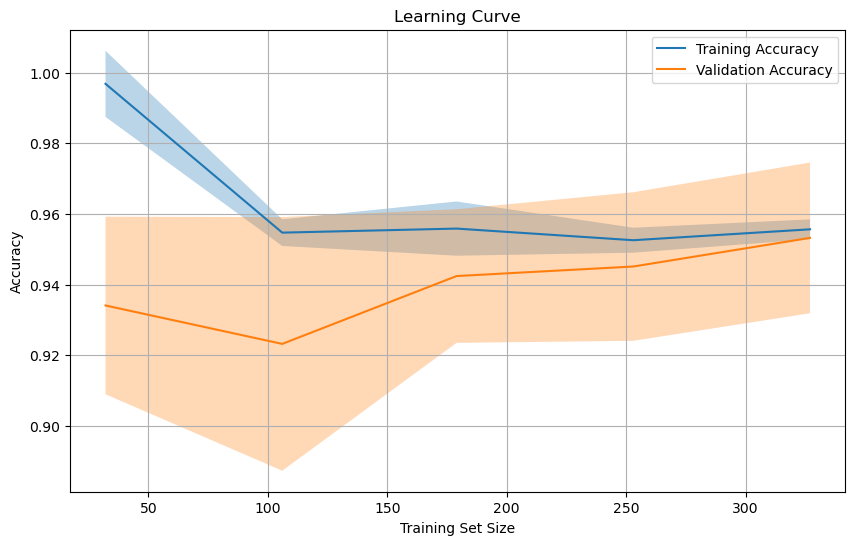

In [19]:
plot_learning_curve(gs_svm_sel.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

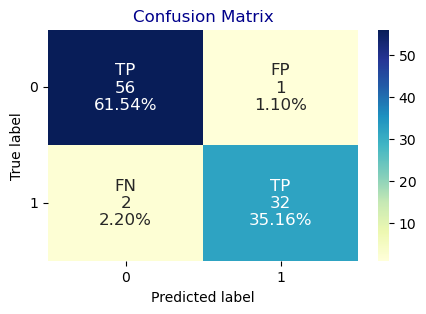

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9655    0.9825    0.9739        57
   Malignant     0.9697    0.9412    0.9552        34

    accuracy                         0.9670        91
   macro avg     0.9676    0.9618    0.9646        91
weighted avg     0.9671    0.9670    0.9669        91

{'model': 'SVC with Feature Selection', 'best_params': {'svm__C': 10, 'svm__gamma': 1, 'svm__kernel': 'rbf'}, 'best_cross_val_score': 0.9532282282282282, 'train_accuracy': 0.9505494505494505, 'test_accuracy': 0.967032967032967, 'Precision': 0.9696969696969697, 'Recall': 0.9411764705882353, 'F1-Score': 0.955223880597015, 'AUC': 0.9881320949432404}


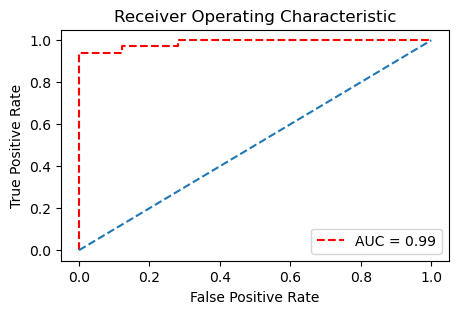

In [20]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_svm_sel, "SVC with Feature Selection", X_val, y_val, classes=["Benign", "Malignant"], results=results)

## KNN
### KNN Without Transformer and PCA

In [21]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

knn = KNeighborsClassifier()

param_grid_knn = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

pipe_knn = Pipeline(steps=[('preprocessor', preprocessor),
                            ('knn', knn)])

gs_knn = GridSearchCV(estimator=pipe_knn,
                      param_grid=param_grid_knn,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_knn.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best knn hyperparameters:", gs_knn.best_params_)
print("Best knn accuracy:", gs_knn.best_score_)

# evaluate model on train_val set
print("knn train accuracy:", gs_knn.score(X_train_val, y_train_val))

# evaluate model on val set
print("knn test accuracy:", gs_knn.score(X_val, y_val))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best knn hyperparameters: {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'uniform'}
Best knn accuracy: 0.9697447447447447
knn train accuracy: 0.9807692307692307
knn test accuracy: 0.978021978021978


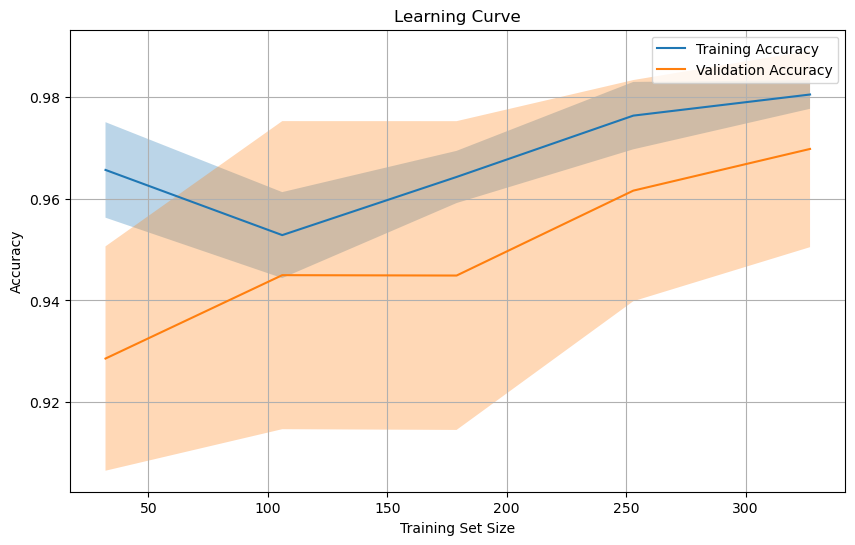

In [22]:
plot_learning_curve(gs_knn.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

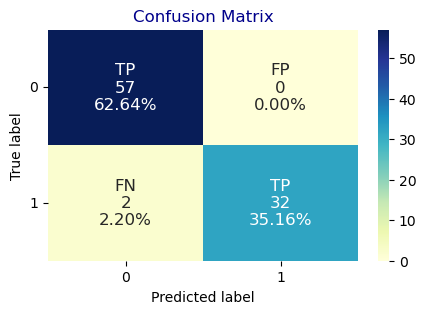

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9661    1.0000    0.9828        57
   Malignant     1.0000    0.9412    0.9697        34

    accuracy                         0.9780        91
   macro avg     0.9831    0.9706    0.9762        91
weighted avg     0.9788    0.9780    0.9779        91

{'model': 'Base KNN', 'best_params': {'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'uniform'}, 'best_cross_val_score': 0.9697447447447447, 'train_accuracy': 0.9807692307692307, 'test_accuracy': 0.978021978021978, 'Precision': 1.0, 'Recall': 0.9411764705882353, 'F1-Score': 0.9696969696969697, 'AUC': 0.9938080495356038}


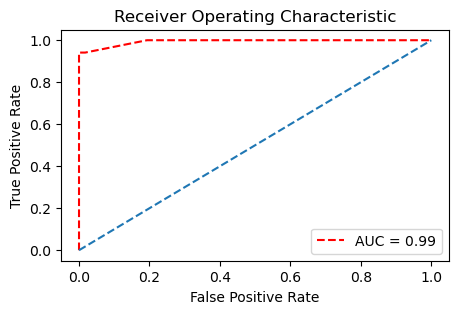

In [23]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_knn, "Base KNN", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### KNN with Transformer

In [24]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

knn = knn = KNeighborsClassifier()

param_grid_knn_tf = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

pipe_knn_tf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('knn', knn)])

gs_knn_tf = GridSearchCV(estimator=pipe_knn_tf,
                      param_grid=param_grid_knn_tf,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_knn_tf.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best knn hyperparameters:", gs_knn_tf.best_params_)
print("Best knn accuracy:", gs_knn_tf.best_score_)

# evaluate model on train_val set
print("knn train accuracy:", gs_knn_tf.score(X_train_val, y_train_val))

# evaluate model on val set
print("knn test accuracy:", gs_knn_tf.score(X_val, y_val))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best knn hyperparameters: {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}
Best knn accuracy: 0.9613363363363362
knn train accuracy: 0.9642857142857143
knn test accuracy: 0.967032967032967


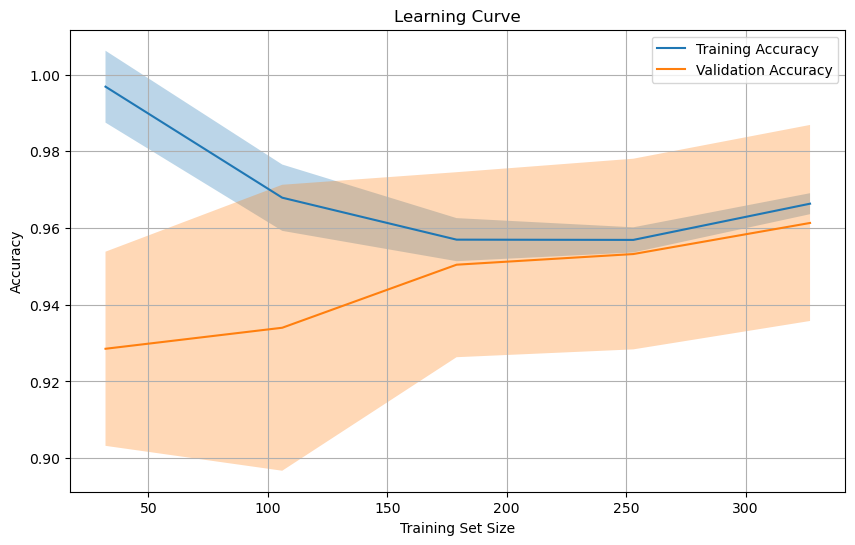

In [25]:
plot_learning_curve(gs_knn_tf.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

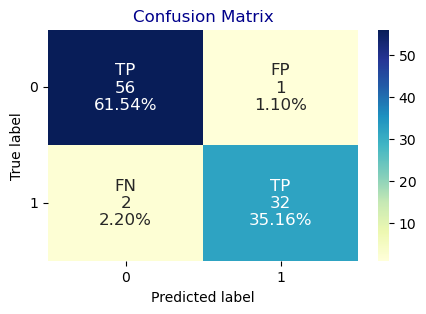

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9655    0.9825    0.9739        57
   Malignant     0.9697    0.9412    0.9552        34

    accuracy                         0.9670        91
   macro avg     0.9676    0.9618    0.9646        91
weighted avg     0.9671    0.9670    0.9669        91

{'model': 'KNN with Transformer', 'best_params': {'knn__n_neighbors': 9, 'knn__p': 1, 'knn__weights': 'uniform'}, 'best_cross_val_score': 0.9613363363363362, 'train_accuracy': 0.9642857142857143, 'test_accuracy': 0.967032967032967, 'Precision': 0.9696969696969697, 'Recall': 0.9411764705882353, 'F1-Score': 0.955223880597015, 'AUC': 0.9943240454076367}


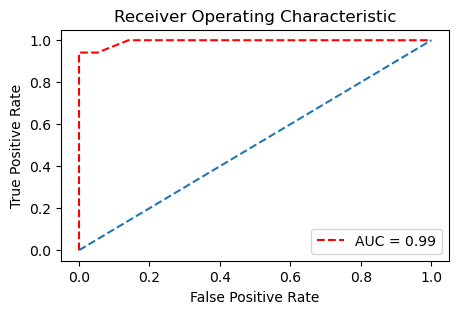

In [26]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_knn_tf, "KNN with Transformer", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### KNN with Transformed and PCA

In [27]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', RobustScaler()),
    ('pca', PCA(n_components=0.95))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

knn = knn = KNeighborsClassifier()

param_grid_knn_pca = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

pipe_knn_pca = Pipeline(steps=[('preprocessor', preprocessor),
                            ('knn', knn)])

gs_knn_pca = GridSearchCV(estimator=pipe_knn_pca,
                      param_grid=param_grid_knn_pca,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_knn_pca.fit(X_train_val, y_train_val)

# Get the number of components selected by PCA
# n_components_selected = gs_knn_pca.best_estimator_.named_steps['preprocessor'].transformers_[0][1].named_steps['pca'].n_components_selected
n_components_selected = gs_knn_pca.best_estimator_.named_steps['preprocessor'].transformers_[0][1].named_steps['pca'].n_components_

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best knn hyperparameters:", gs_knn_pca.best_params_)
print("Best knn accuracy:", gs_knn_pca.best_score_)
print("Number of PCA components selected:", n_components_selected)

# evaluate model on train_val set
print("knn train accuracy:", gs_knn_pca.score(X_train_val, y_train_val))

# evaluate model on val set
print("knn test accuracy:", gs_knn_pca.score(X_val, y_val))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best knn hyperparameters: {'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance'}
Best knn accuracy: 0.9696696696696696
Number of PCA components selected: 9
knn train accuracy: 1.0
knn test accuracy: 0.967032967032967


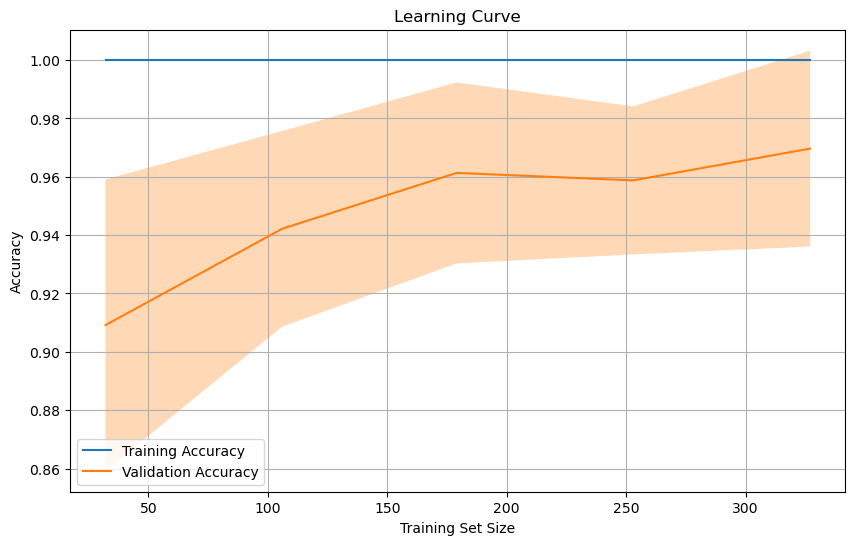

In [28]:
plot_learning_curve(gs_knn_pca.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

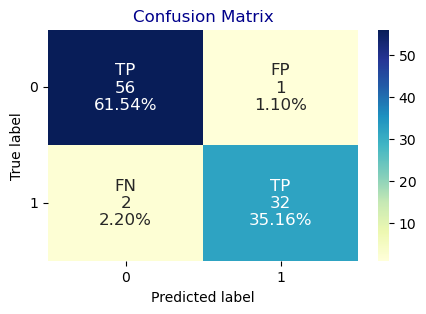

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9655    0.9825    0.9739        57
   Malignant     0.9697    0.9412    0.9552        34

    accuracy                         0.9670        91
   macro avg     0.9676    0.9618    0.9646        91
weighted avg     0.9671    0.9670    0.9669        91

{'model': 'KNN with PCA', 'best_params': {'knn__n_neighbors': 15, 'knn__p': 1, 'knn__weights': 'distance'}, 'best_cross_val_score': 0.9696696696696696, 'train_accuracy': 1.0, 'test_accuracy': 0.967032967032967, 'Precision': 0.9696969696969697, 'Recall': 0.9411764705882353, 'F1-Score': 0.955223880597015, 'AUC': 0.9922600619195046}


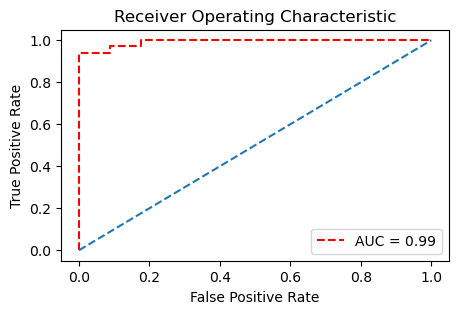

In [29]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_knn_pca, "KNN with PCA", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### KNN with Transformer and Feature Selection

In [30]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', RobustScaler()),
#     ('pca', PCA(n_components=0.95))
    ('selector', SelectKBest(score_func=f_regression, k=10))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

knn = knn = KNeighborsClassifier()

param_grid_knn_sel = {
    'knn__n_neighbors': np.arange(1, 31, 2),
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1,2]
}

pipe_knn_sel = Pipeline(steps=[('preprocessor', preprocessor),
                            ('knn', knn)])

gs_knn_sel = GridSearchCV(estimator=pipe_knn_sel,
                      param_grid=param_grid_knn_sel,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_knn_sel.fit(X_train_val, y_train_val)

# Get the number of components selected by PCA
# n_components_selected = gs_knn_sel.best_estimator_.named_steps['preprocessor'].transformers_[0][1].named_steps['pca'].n_components_selected


# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best knn hyperparameters:", gs_knn_sel.best_params_)
print("Best knn accuracy:", gs_knn_sel.best_score_)
# print("Number of PCA components selected:", n_components_selected)

# evaluate model on train_val set
print("knn train accuracy:", gs_knn_sel.score(X_train_val, y_train_val))

# evaluate model on val set
print("knn test accuracy:", gs_knn_sel.score(X_val, y_val))

Fitting 10 folds for each of 60 candidates, totalling 600 fits
Best knn hyperparameters: {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform'}
Best knn accuracy: 0.9505255255255254
knn train accuracy: 0.9587912087912088
knn test accuracy: 0.9560439560439561


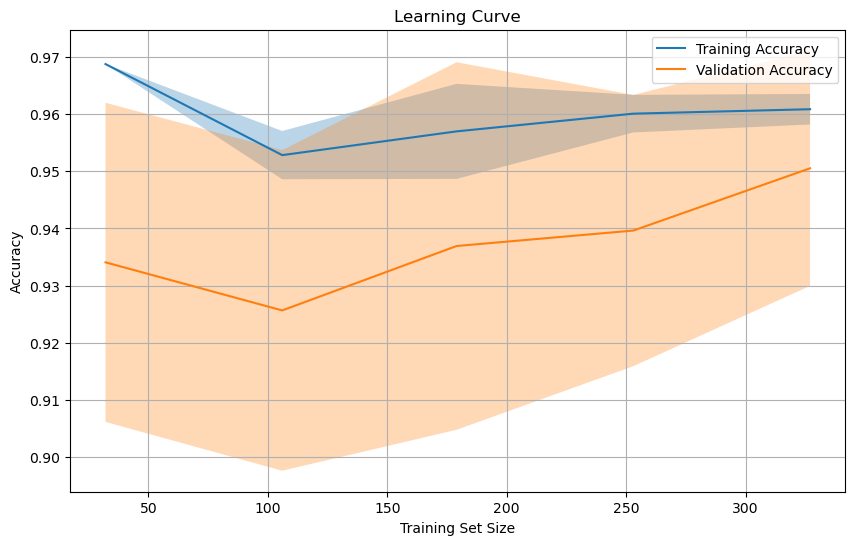

In [31]:
plot_learning_curve(gs_knn_sel.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

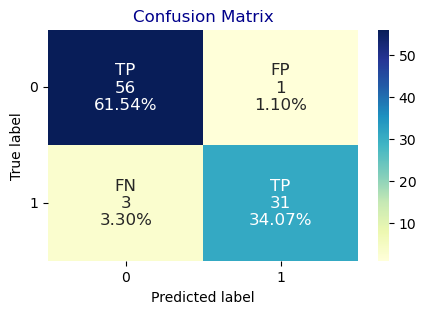

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9492    0.9825    0.9655        57
   Malignant     0.9688    0.9118    0.9394        34

    accuracy                         0.9560        91
   macro avg     0.9590    0.9471    0.9525        91
weighted avg     0.9565    0.9560    0.9558        91

{'model': 'KNN with Feature Selection', 'best_params': {'knn__n_neighbors': 5, 'knn__p': 1, 'knn__weights': 'uniform'}, 'best_cross_val_score': 0.9505255255255254, 'train_accuracy': 0.9587912087912088, 'test_accuracy': 0.9560439560439561, 'Precision': 0.96875, 'Recall': 0.9117647058823529, 'F1-Score': 0.9393939393939394, 'AUC': 0.978328173374613}


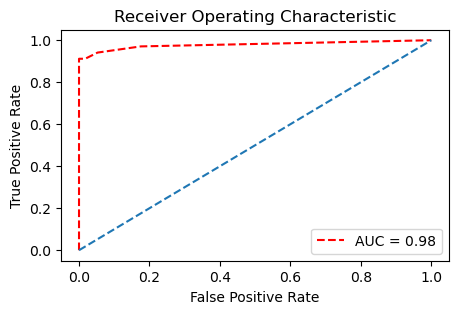

In [32]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_knn_sel, "KNN with Feature Selection", X_val, y_val, classes=["Benign", "Malignant"], results=results)

## Logistic Regression
### Base Logreg

In [33]:
from sklearn.linear_model import LogisticRegression

numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

logreg = LogisticRegression(random_state=1)

param_grid_logreg = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs', 'liblinear', 'saga']
}

pipe_logreg = Pipeline(steps=[('preprocessor', preprocessor),
                              ('logreg', logreg)])

gs_logreg = GridSearchCV(estimator=pipe_logreg,
                         param_grid=param_grid_logreg,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1,
                         verbose=1)

gs_logreg.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best logistic regression hyperparameters:", gs_logreg.best_params_)
print("Best logistic regression accuracy:", gs_logreg.best_score_)

# evaluate model on train_val set
print("Logistic regression train accuracy:", gs_logreg.score(X_train_val, y_train_val))

# evaluate model on val set
print("Logistic regression test accuracy:", gs_logreg.score(X_val, y_val))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best logistic regression hyperparameters: {'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
Best logistic regression accuracy: 0.9780030030030028
Logistic regression train accuracy: 0.9835164835164835
Logistic regression test accuracy: 0.9560439560439561


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_logistic.py", line 10

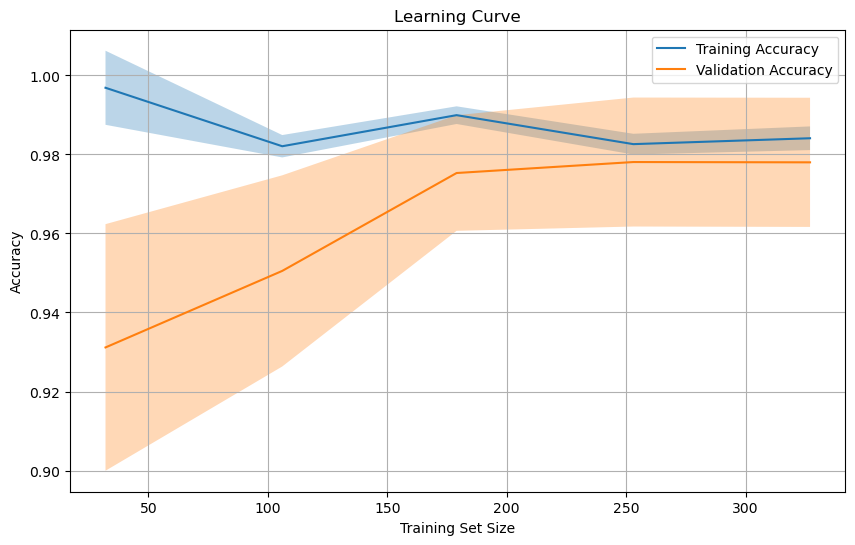

In [34]:
plot_learning_curve(gs_logreg.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

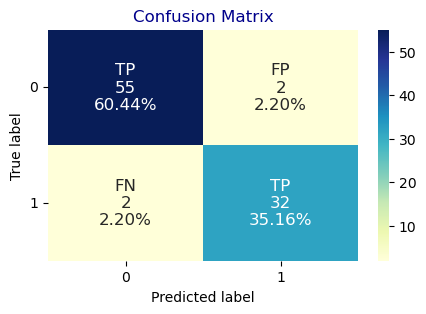

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9649    0.9649    0.9649        57
   Malignant     0.9412    0.9412    0.9412        34

    accuracy                         0.9560        91
   macro avg     0.9530    0.9530    0.9530        91
weighted avg     0.9560    0.9560    0.9560        91

{'model': 'Base Logreg', 'best_params': {'logreg__C': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}, 'best_cross_val_score': 0.9780030030030028, 'train_accuracy': 0.9835164835164835, 'test_accuracy': 0.9560439560439561, 'Precision': 0.9411764705882353, 'Recall': 0.9411764705882353, 'F1-Score': 0.9411764705882353, 'AUC': 0.9943240454076367}


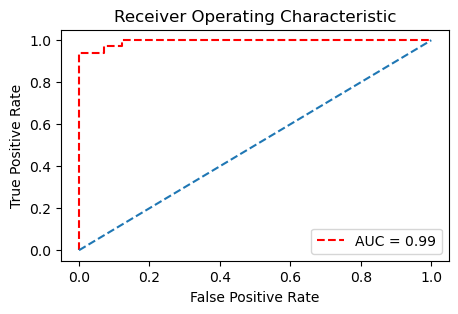

In [35]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_logreg, "Base Logreg", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### Logreg with Transformer

In [36]:
from sklearn.linear_model import LogisticRegression

numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

logreg = LogisticRegression(random_state=1)

param_grid_logreg_tf = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs', 'liblinear', 'saga']
}

pipe_logreg_tf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('logreg', logreg)])

gs_logreg_tf = GridSearchCV(estimator=pipe_logreg_tf,
                         param_grid=param_grid_logreg_tf,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1,
                         verbose=1)

gs_logreg_tf.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best logistic regression hyperparameters:", gs_logreg_tf.best_params_)
print("Best logistic regression accuracy:", gs_logreg_tf.best_score_)

# evaluate model on train_val set
print("Logistic regression train accuracy:", gs_logreg_tf.score(X_train_val, y_train_val))

# evaluate model on val set
print("Logistic regression test accuracy:", gs_logreg_tf.score(X_val, y_val))

Fitting 10 folds for each of 30 candidates, totalling 300 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_logistic.py", line 10

Best logistic regression hyperparameters: {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best logistic regression accuracy: 0.978003003003003
Logistic regression train accuracy: 0.989010989010989
Logistic regression test accuracy: 0.9560439560439561


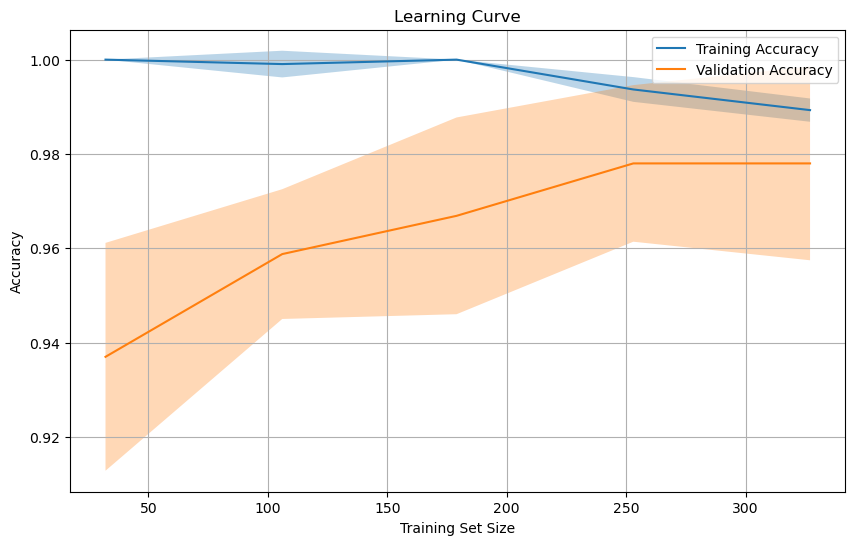

In [37]:
plot_learning_curve(gs_logreg_tf.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

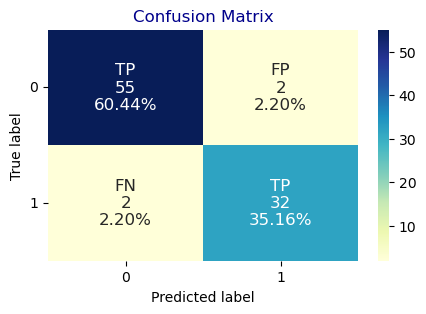

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9649    0.9649    0.9649        57
   Malignant     0.9412    0.9412    0.9412        34

    accuracy                         0.9560        91
   macro avg     0.9530    0.9530    0.9530        91
weighted avg     0.9560    0.9560    0.9560        91

{'model': 'Logreg with Transformer', 'best_params': {'logreg__C': 10, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}, 'best_cross_val_score': 0.978003003003003, 'train_accuracy': 0.989010989010989, 'test_accuracy': 0.9560439560439561, 'Precision': 0.9411764705882353, 'Recall': 0.9411764705882353, 'F1-Score': 0.9411764705882353, 'AUC': 0.9922600619195046}


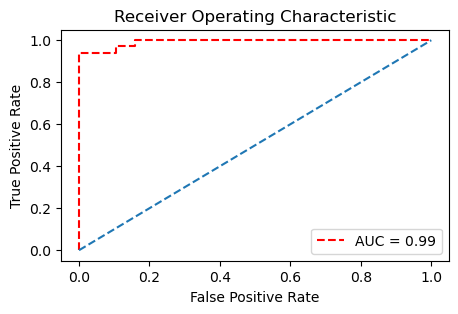

In [38]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_logreg_tf, "Logreg with Transformer", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### Logreg with Transformer and PCA

In [39]:
from sklearn.linear_model import LogisticRegression

numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

logreg = LogisticRegression(random_state=1)

param_grid_logreg_pca = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.01, 0.1, 1, 10, 100],
    'logreg__solver': ['lbfgs', 'liblinear', 'saga']
}

pipe_logreg_pca = Pipeline(steps=[('preprocessor', preprocessor),
                              ('logreg', logreg)])

gs_logreg_pca = GridSearchCV(estimator=pipe_logreg_pca,
                         param_grid=param_grid_logreg_pca,
                         scoring='accuracy',
                         cv=10,
                         n_jobs=-1,
                         verbose=1)

gs_logreg_pca.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best logistic regression hyperparameters:", gs_logreg_pca.best_params_)
print("Best logistic regression accuracy:", gs_logreg_pca.best_score_)

# evaluate model on train_val set
print("Logistic regression train accuracy:", gs_logreg_pca.score(X_train_val, y_train_val))

# evaluate model on val set
print("Logistic regression test accuracy:", gs_logreg_pca.score(X_val, y_val))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best logistic regression hyperparameters: {'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}
Best logistic regression accuracy: 0.9724474474474475
Logistic regression train accuracy: 0.9752747252747253
Logistic regression test accuracy: 0.945054945054945


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
50 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_logistic.py", line 10

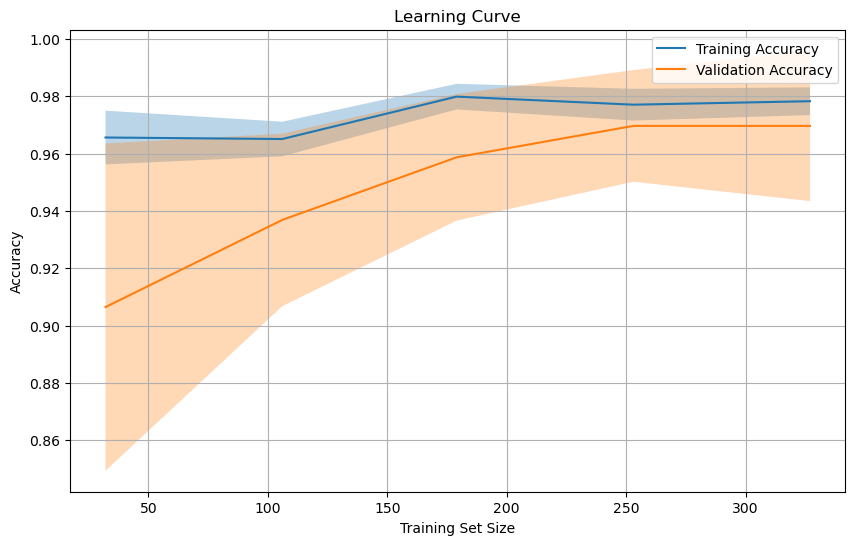

In [40]:
plot_learning_curve(gs_logreg_pca.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

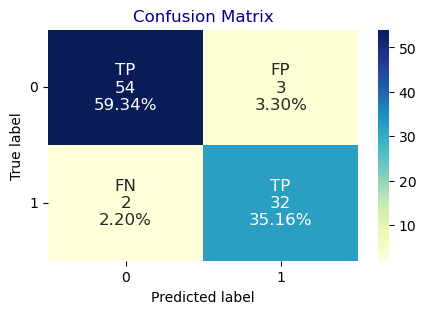

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9643    0.9474    0.9558        57
   Malignant     0.9143    0.9412    0.9275        34

    accuracy                         0.9451        91
   macro avg     0.9393    0.9443    0.9416        91
weighted avg     0.9456    0.9451    0.9452        91

{'model': 'Logreg with PCA', 'best_params': {'logreg__C': 1, 'logreg__penalty': 'l1', 'logreg__solver': 'liblinear'}, 'best_cross_val_score': 0.9724474474474475, 'train_accuracy': 0.9752747252747253, 'test_accuracy': 0.945054945054945, 'Precision': 0.9142857142857143, 'Recall': 0.9411764705882353, 'F1-Score': 0.9275362318840579, 'AUC': 0.9901960784313726}


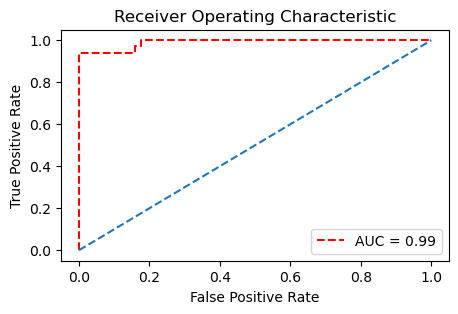

In [41]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_logreg_pca, "Logreg with PCA", X_val, y_val, classes=["Benign", "Malignant"], results=results)

In [42]:
results

[{'model': 'Base SVC',
  'best_params': {'svm__C': 1, 'svm__gamma': 0.001, 'svm__kernel': 'linear'},
  'best_cross_val_score': 0.978078078078078,
  'train_accuracy': 0.9807692307692307,
  'test_accuracy': 0.978021978021978,
  'Precision': 1.0,
  'Recall': 0.9411764705882353,
  'F1-Score': 0.9696969696969697,
  'AUC': 0.9860681114551084},
 {'model': 'SVC with Transformer',
  'best_params': {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'},
  'best_cross_val_score': 0.9861861861861861,
  'train_accuracy': 0.9917582417582418,
  'test_accuracy': 0.978021978021978,
  'Precision': 1.0,
  'Recall': 0.9411764705882353,
  'F1-Score': 0.9696969696969697,
  'AUC': 0.9958720330237357},
 {'model': 'SVC with PCA',
  'best_params': {'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': 'rbf'},
  'best_cross_val_score': 0.9725225225225225,
  'train_accuracy': 0.9917582417582418,
  'test_accuracy': 0.978021978021978,
  'Precision': 1.0,
  'Recall': 0.9411764705882353,
  'F1-Score': 0.9696969696969697,
  'AUC

## Decision Tree
### Base DT using GridSearch

In [43]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

dt = DecisionTreeClassifier(random_state=1)

param_grid_dt = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 5, 10, 15, 20],
    'dt__min_samples_split': [2, 5, 10], #optional
    'dt__min_samples_leaf': [1, 2, 4], #optional
    'dt__max_features': [None, 'sqrt', 'log2'] #optional
}


pipe_dt = Pipeline(steps=[('preprocessor', preprocessor),
                            ('dt', dt)])

gs_dt = GridSearchCV(estimator=pipe_dt,
                      param_grid=param_grid_dt,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_dt.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best dt hyperparameters:", gs_dt.best_params_)
print("Best dt accuracy:", gs_dt.best_score_)

# evaluate model on train_val set
print("dt train accuracy:", gs_dt.score(X_train_val, y_train_val))

# evaluate model on val set
print("dt test accuracy:", gs_dt.score(X_val, y_val))

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
Best dt hyperparameters: {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__max_features': None, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}
Best dt accuracy: 0.956081081081081
dt train accuracy: 0.978021978021978
dt test accuracy: 0.9340659340659341


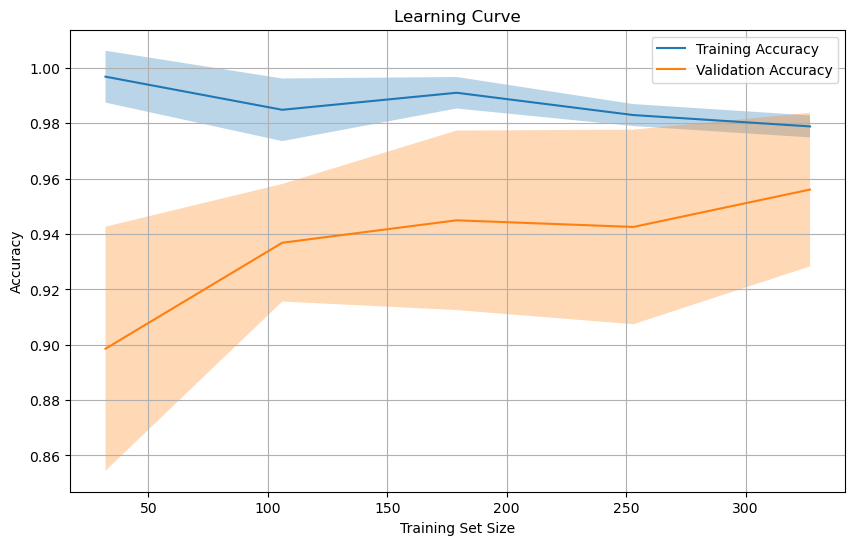

In [44]:
plot_learning_curve(gs_dt.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

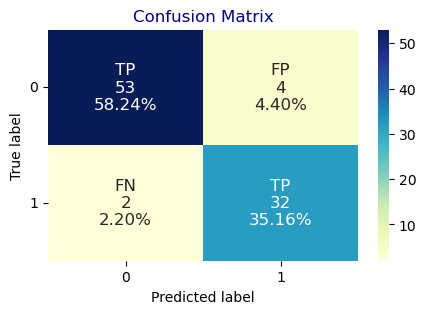

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9636    0.9298    0.9464        57
   Malignant     0.8889    0.9412    0.9143        34

    accuracy                         0.9341        91
   macro avg     0.9263    0.9355    0.9304        91
weighted avg     0.9357    0.9341    0.9344        91

{'model': 'Base Decision Tree', 'best_params': {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__max_features': None, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}, 'best_cross_val_score': 0.956081081081081, 'train_accuracy': 0.978021978021978, 'test_accuracy': 0.9340659340659341, 'Precision': 0.8888888888888888, 'Recall': 0.9411764705882353, 'F1-Score': 0.9142857142857143, 'AUC': 0.9654282765737874}


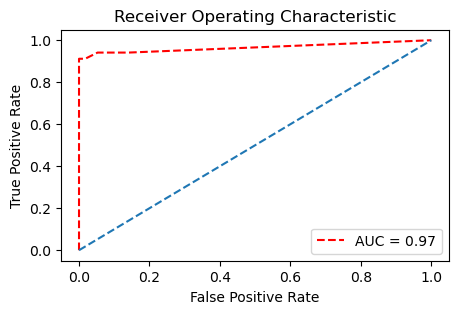

In [45]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_dt, "Base Decision Tree", X_val, y_val, classes=["Benign", "Malignant"], results=results)

#### Feature Importance

In [46]:
# Get the best fitted model
best_model_dt = gs_dt.best_estimator_.named_steps['dt']

# Get feature importances
feature_importances_dt = best_model_dt.feature_importances_

# Create a DataFrame to display the feature importances
importance_df_dt = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_dt})
importance_df_dt = importance_df_dt.sort_values('Importance', ascending=False)

# Print the feature importances
print("Feature Importance:")
print(importance_df_dt)

Feature Importance:
                    Feature  Importance
22          perimeter_worst    0.662398
27     concave points_worst    0.169642
21            texture_worst    0.056685
1              texture_mean    0.035666
13                  area_se    0.030069
17        concave points_se    0.015540
19     fractal_dimension_se    0.014992
16             concavity_se    0.005285
18              symmetry_se    0.005285
20             radius_worst    0.004438
0               radius_mean    0.000000
28           symmetry_worst    0.000000
26          concavity_worst    0.000000
25        compactness_worst    0.000000
24         smoothness_worst    0.000000
23               area_worst    0.000000
15           compactness_se    0.000000
14            smoothness_se    0.000000
12             perimeter_se    0.000000
11               texture_se    0.000000
10                radius_se    0.000000
9    fractal_dimension_mean    0.000000
8             symmetry_mean    0.000000
7       concave poin

In [47]:
k = 10  # Number of top features to select
top_k_indices_dt = np.argsort(feature_importances_dt)[::-1][:k]

selected_features_dt = X_train_val.columns[top_k_indices_dt]  # Assuming X_train_val is a pandas DataFrame
# or
# selected_feature_indices_dt = top_k_indices_dt  # If you are using column indices directly
selected_features_dt

Index(['perimeter_worst', 'concave points_worst', 'texture_worst',
       'texture_mean', 'area_se', 'concave points_se', 'fractal_dimension_se',
       'concavity_se', 'symmetry_se', 'radius_worst'],
      dtype='object')

In [48]:
X_train_val_selected_dt = X_train_val[selected_features_dt]
# or
# X_train_val_selected_dt = X_train_val.iloc[:, selected_feature_indices_dt]

In [49]:
numeric_features_selected = list(range(10))

# Create a new preprocessor with the selected features
selected_features_transformer = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features_selected)
])

# Create a new pipeline with the selected features and the best hyperparameters
pipe_dt_selected_features = Pipeline(steps=[
    ('preprocessor', selected_features_transformer),
    ('dt', DecisionTreeClassifier(criterion=gs_dt.best_params_['dt__criterion'],
                                  max_depth=gs_dt.best_params_['dt__max_depth'],
                                  min_samples_split=gs_dt.best_params_['dt__min_samples_split'],
                                  min_samples_leaf=gs_dt.best_params_['dt__min_samples_leaf'],
                                  max_features=gs_dt.best_params_['dt__max_features'],
                                  random_state=1))
])

# Train the model on the selected features
pipe_dt_selected_features.fit(X_train_val_selected_dt, y_train_val)

# Evaluate the model on train_val set
print("dt train accuracy (selected features):", pipe_dt_selected_features.score(X_train_val_selected_dt, y_train_val))

# Evaluate the model on val set
print("dt test accuracy (selected features):", pipe_dt_selected_features.score(X_val, y_val))


dt train accuracy (selected features): 0.978021978021978
dt test accuracy (selected features): 0.9340659340659341


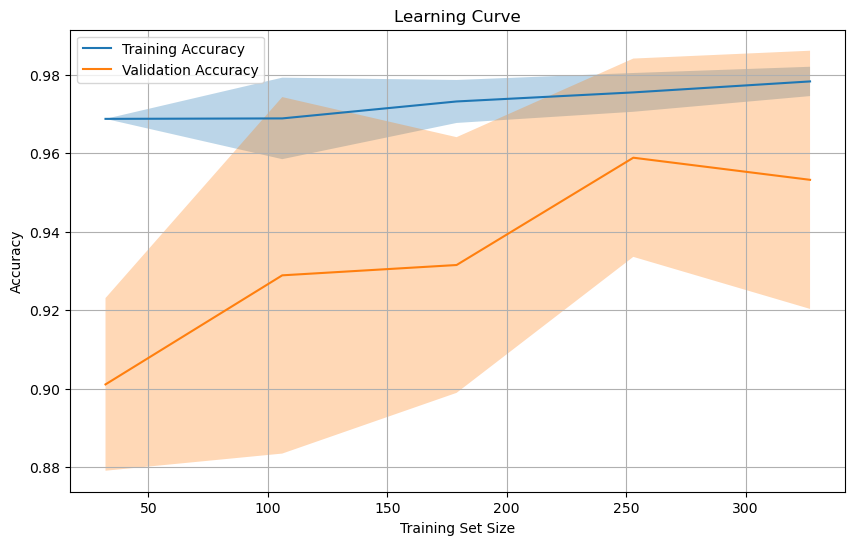

In [50]:
plot_learning_curve(pipe_dt_selected_features, X_train_val_selected_dt, y_train_val, cv=10, scoring='accuracy')

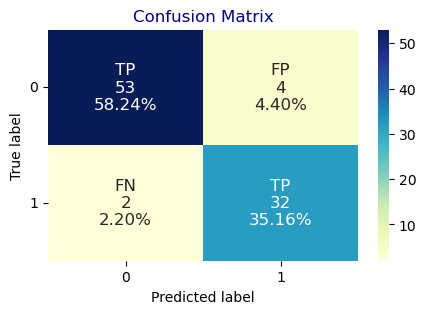

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9636    0.9298    0.9464        57
   Malignant     0.8889    0.9412    0.9143        34

    accuracy                         0.9341        91
   macro avg     0.9263    0.9355    0.9304        91
weighted avg     0.9357    0.9341    0.9344        91

{'model': 'Decision Tree Feature Importance', 'best_params': None, 'best_cross_val_score': None, 'train_accuracy': 0.978021978021978, 'test_accuracy': 0.9340659340659341, 'Precision': 0.8888888888888888, 'Recall': 0.9411764705882353, 'F1-Score': 0.9142857142857143, 'AUC': 0.9574303405572756}


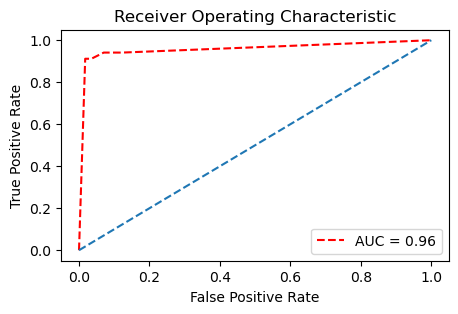

In [51]:
# model, model_name, X, y, classes=None
ml_evaluation(pipe_dt_selected_features, "Decision Tree Feature Importance", X_val, y_val, X_train_val_selected_dt, y_train_val, classes=["Benign", "Malignant"], results=results)

### DT with Transformer

In [52]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

dt = DecisionTreeClassifier(random_state=1)

param_grid_dt_tf = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 5, 10, 15, 20],
    'dt__min_samples_split': [2, 5, 10], #optional
    'dt__min_samples_leaf': [1, 2, 4], #optional
    'dt__max_features': [None, 'sqrt', 'log2'] #optional
}

pipe_dt_tf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('dt', dt)])

gs_dt_tf = GridSearchCV(estimator=pipe_dt_tf,
                      param_grid=param_grid_dt_tf,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_dt_tf.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best dt hyperparameters:", gs_dt_tf.best_params_)
print("Best dt accuracy:", gs_dt_tf.best_score_)

# evaluate model on train_val set
print("dt train accuracy:", gs_dt_tf.score(X_train_val, y_train_val))

# evaluate model on val set
print("dt test accuracy:", gs_dt_tf.score(X_val, y_val))

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
Best dt hyperparameters: {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__max_features': None, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}
Best dt accuracy: 0.956081081081081
dt train accuracy: 0.978021978021978
dt test accuracy: 0.9230769230769231


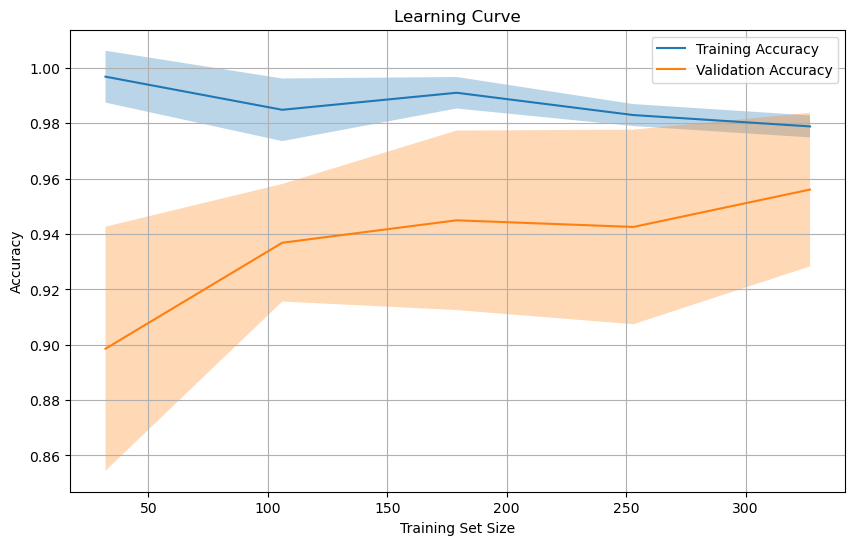

In [53]:
plot_learning_curve(gs_dt_tf.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

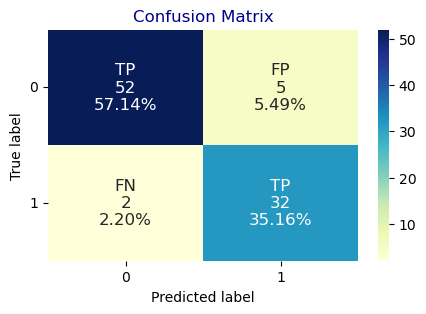

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9630    0.9123    0.9369        57
   Malignant     0.8649    0.9412    0.9014        34

    accuracy                         0.9231        91
   macro avg     0.9139    0.9267    0.9192        91
weighted avg     0.9263    0.9231    0.9237        91

{'model': 'Decision Tree with Transformer', 'best_params': {'dt__criterion': 'entropy', 'dt__max_depth': None, 'dt__max_features': None, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 2}, 'best_cross_val_score': 0.956081081081081, 'train_accuracy': 0.978021978021978, 'test_accuracy': 0.9230769230769231, 'Precision': 0.8648648648648649, 'Recall': 0.9411764705882353, 'F1-Score': 0.9014084507042254, 'AUC': 0.9643962848297214}


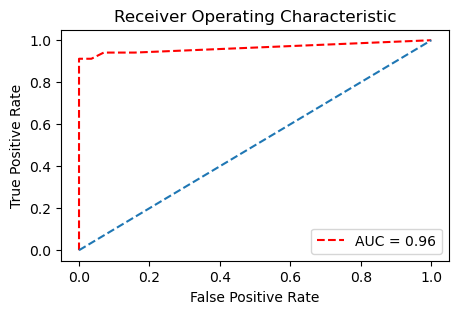

In [54]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_dt_tf, "Decision Tree with Transformer", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### DT with Transformer and PCA

In [55]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

dt = DecisionTreeClassifier(random_state=1)

param_grid_dt_pca = {
    'dt__criterion': ['gini', 'entropy'],
    'dt__max_depth': [None, 5, 10, 15, 20],
    'dt__min_samples_split': [2, 5, 10], #optional
    'dt__min_samples_leaf': [1, 2, 4], #optional
    'dt__max_features': [None, 'sqrt', 'log2'] #optional
}

pipe_dt_pca = Pipeline(steps=[('preprocessor', preprocessor),
                            ('dt', dt)])

gs_dt_pca = GridSearchCV(estimator=pipe_dt_pca,
                      param_grid=param_grid_dt_pca,
                      scoring='accuracy',
                      cv=10,
                      n_jobs=-1,
                      verbose=1)

gs_dt_pca.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best dt hyperparameters:", gs_dt_pca.best_params_)
print("Best dt accuracy:", gs_dt_pca.best_score_)

# evaluate model on train_val set
print("dt train accuracy:", gs_dt_pca.score(X_train_val, y_train_val))

# evaluate model on val set
print("dt test accuracy:", gs_dt_pca.score(X_val, y_val))

Fitting 10 folds for each of 270 candidates, totalling 2700 fits
Best dt hyperparameters: {'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__max_features': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}
Best dt accuracy: 0.9369369369369368
dt train accuracy: 0.9835164835164835
dt test accuracy: 0.9230769230769231


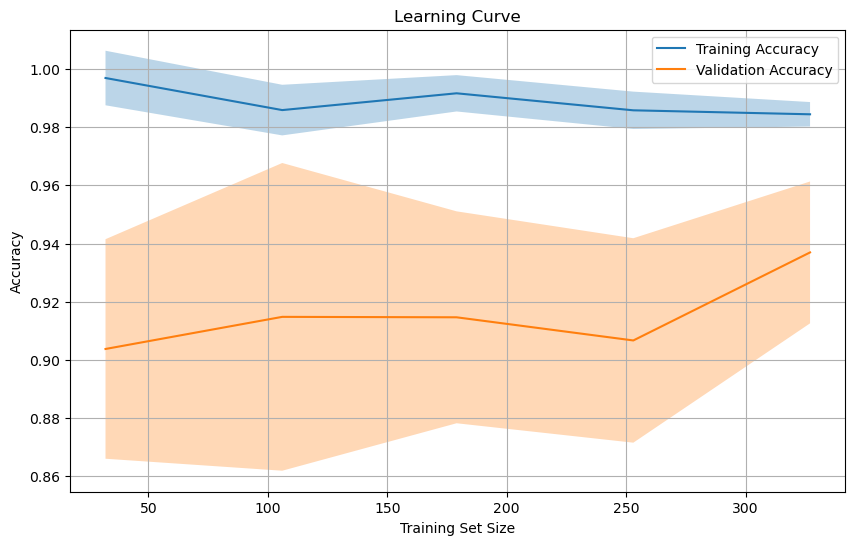

In [56]:
plot_learning_curve(gs_dt_pca.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

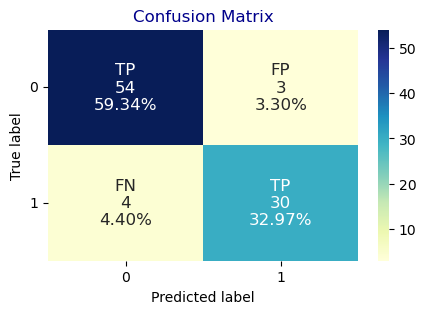

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9310    0.9474    0.9391        57
   Malignant     0.9091    0.8824    0.8955        34

    accuracy                         0.9231        91
   macro avg     0.9201    0.9149    0.9173        91
weighted avg     0.9228    0.9231    0.9228        91

{'model': 'Decision Tree with PCA', 'best_params': {'dt__criterion': 'gini', 'dt__max_depth': 5, 'dt__max_features': None, 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 5}, 'best_cross_val_score': 0.9369369369369368, 'train_accuracy': 0.9835164835164835, 'test_accuracy': 0.9230769230769231, 'Precision': 0.9090909090909091, 'Recall': 0.8823529411764706, 'F1-Score': 0.8955223880597014, 'AUC': 0.8748710010319917}


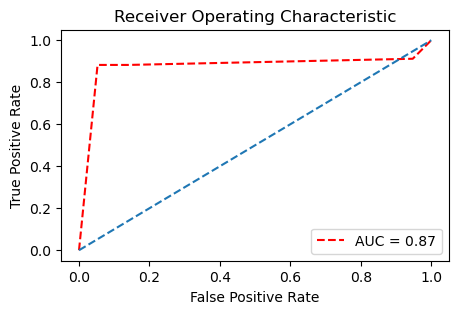

In [57]:
# model, model_name, X, y, classes=None
ml_evaluation(gs_dt_pca, "Decision Tree with PCA", X_val, y_val, classes=["Benign", "Malignant"], results=results)

## Random Forest
### Base RF using Random Search

In [58]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

rf = RandomForestClassifier(random_state=1)

param_grid_rf = {
    "rf__n_estimators": list(range(100, 1001, 50)), 
    "rf__criterion": ["gini", "entropy"], 
    "rf__max_depth": [None, 2, 4, 6, 8, 10], 
    "rf__min_samples_split": [2, 4, 6, 8, 10], 
    "rf__min_samples_leaf": [1, 2, 4, 6, 8, 10],
    'rf__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'rf__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


pipe_rf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('rf', rf)])

rs_rf = RandomizedSearchCV(estimator=pipe_rf, 
                           param_distributions=param_grid_rf, 
                           cv=10, 
                           n_iter=70, 
                           scoring="accuracy", 
                           n_jobs=-1, 
                           verbose=1,
                           random_state=1)

rs_rf.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best rf hyperparameters:", rs_rf.best_params_)
print("Best rf accuracy:", rs_rf.best_score_)

# evaluate model on train_val set
print("rf train accuracy:", rs_rf.score(X_train_val, y_train_val))

# evaluate model on val set
print("rf test accuracy:", rs_rf.score(X_val, y_val))

Fitting 10 folds for each of 70 candidates, totalling 700 fits
Best rf hyperparameters: {'rf__n_estimators': 550, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 'log2', 'rf__max_depth': 6, 'rf__criterion': 'entropy', 'rf__bootstrap': True}
Best rf accuracy: 0.956081081081081
rf train accuracy: 0.9972527472527473
rf test accuracy: 0.967032967032967


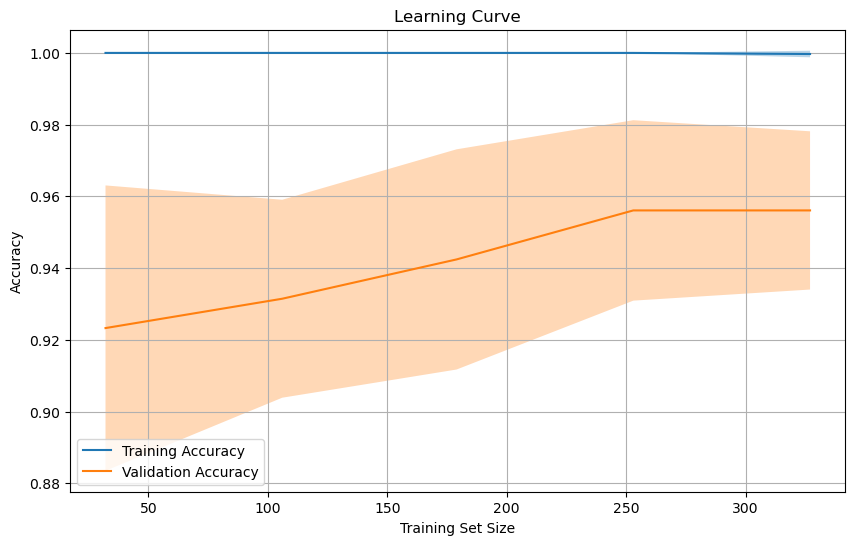

In [59]:
plot_learning_curve(rs_rf.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

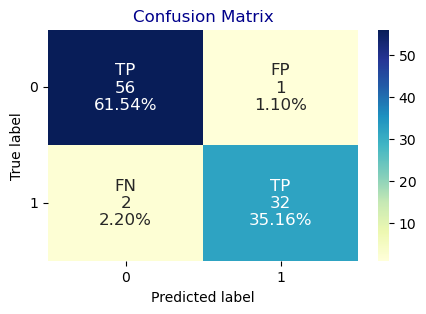

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9655    0.9825    0.9739        57
   Malignant     0.9697    0.9412    0.9552        34

    accuracy                         0.9670        91
   macro avg     0.9676    0.9618    0.9646        91
weighted avg     0.9671    0.9670    0.9669        91

{'model': 'Base Random Forest', 'best_params': {'rf__n_estimators': 550, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 1, 'rf__max_features': 'log2', 'rf__max_depth': 6, 'rf__criterion': 'entropy', 'rf__bootstrap': True}, 'best_cross_val_score': 0.956081081081081, 'train_accuracy': 0.9972527472527473, 'test_accuracy': 0.967032967032967, 'Precision': 0.9696969696969697, 'Recall': 0.9411764705882353, 'F1-Score': 0.955223880597015, 'AUC': 0.9932920536635707}


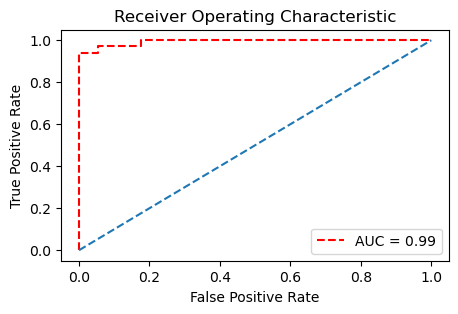

In [60]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_rf, "Base Random Forest", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### RF with Transformer

In [61]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler()),
#     ('pca', PCA(n_components=0.95))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

rf = RandomForestClassifier(random_state=1)

param_grid_rf_tf = {
    "rf__n_estimators": list(range(100, 1001, 50)), 
    "rf__criterion": ["gini", "entropy"], 
    "rf__max_depth": [None, 2, 4, 6, 8, 10], 
    "rf__min_samples_split": [2, 4, 6, 8, 10], 
    "rf__min_samples_leaf": [1, 2, 4, 6, 8, 10],
    'rf__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'rf__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


pipe_rf_tf = Pipeline(steps=[('preprocessor', preprocessor),
                            ('rf', rf)])

rs_rf_tf = RandomizedSearchCV(estimator=pipe_rf_tf, 
                           param_distributions=param_grid_rf_tf, 
                           cv=10, 
                           n_iter=70, 
                           scoring="accuracy", 
                           n_jobs=-1, 
                           verbose=2,
                           random_state=1)

rs_rf_tf.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best rf hyperparameters:", rs_rf_tf.best_params_)
print("Best rf accuracy:", rs_rf_tf.best_score_)

# evaluate model on train_val set
print("rf train accuracy:", rs_rf_tf.score(X_train_val, y_train_val))

# evaluate model on val set
print("rf test accuracy:", rs_rf_tf.score(X_val, y_val))

Fitting 10 folds for each of 70 candidates, totalling 700 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\ensemble\_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best rf hyperparameters: {'rf__n_estimators': 1000, 'rf__min_samples_split': 4, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': 8, 'rf__criterion': 'entropy', 'rf__bootstrap': True}
Best rf accuracy: 0.9588588588588587
rf train accuracy: 1.0
rf test accuracy: 0.967032967032967


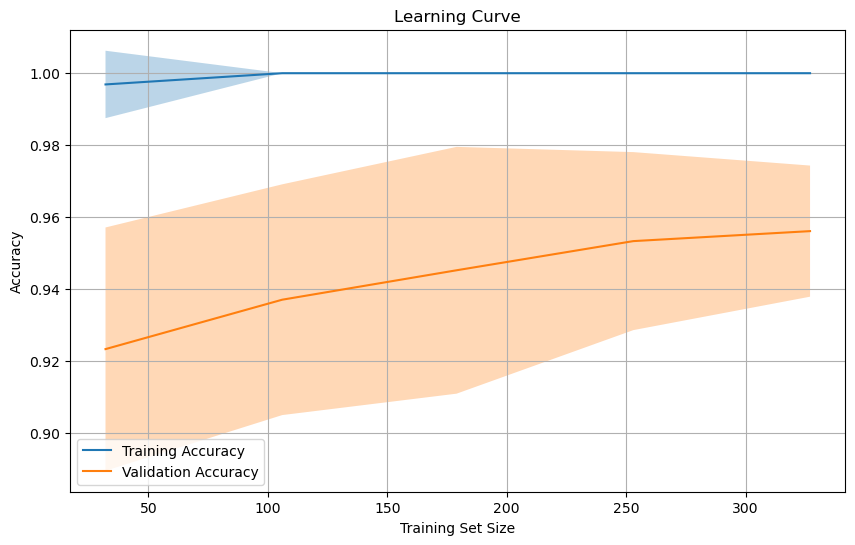

In [62]:
plot_learning_curve(rs_rf_tf.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

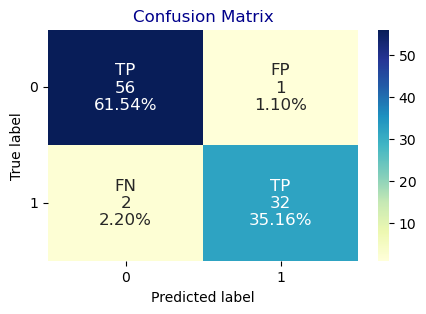

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9655    0.9825    0.9739        57
   Malignant     0.9697    0.9412    0.9552        34

    accuracy                         0.9670        91
   macro avg     0.9676    0.9618    0.9646        91
weighted avg     0.9671    0.9670    0.9669        91

{'model': 'Random Forest with Transformer', 'best_params': {'rf__n_estimators': 1000, 'rf__min_samples_split': 4, 'rf__min_samples_leaf': 1, 'rf__max_features': 'auto', 'rf__max_depth': 8, 'rf__criterion': 'entropy', 'rf__bootstrap': True}, 'best_cross_val_score': 0.9588588588588587, 'train_accuracy': 1.0, 'test_accuracy': 0.967032967032967, 'Precision': 0.9696969696969697, 'Recall': 0.9411764705882353, 'F1-Score': 0.955223880597015, 'AUC': 0.9927760577915377}


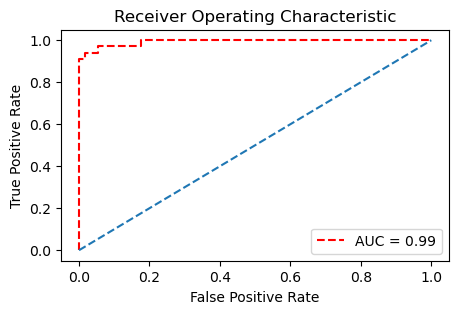

In [63]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_rf_tf, "Random Forest with Transformer", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### RF with PCA

In [64]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer(method='yeo-johnson')),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

rf = RandomForestClassifier(random_state=1)

param_grid_rf_pca = {
    "rf__n_estimators": list(range(100, 1001, 50)), 
    "rf__criterion": ["gini", "entropy"], 
    "rf__max_depth": [None, 2, 4, 6, 8, 10], 
    "rf__min_samples_split": [2, 4, 6, 8, 10], 
    "rf__min_samples_leaf": [1, 2, 4, 6, 8, 10],
    'rf__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'rf__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}


pipe_rf_pca = Pipeline(steps=[('preprocessor', preprocessor),
                            ('rf', rf)])

rs_rf_pca = RandomizedSearchCV(estimator=pipe_rf_pca, 
                           param_distributions=param_grid_rf_pca, 
                           cv=10, 
                           n_iter=70, 
                           scoring="accuracy", 
                           n_jobs=-1, 
                           verbose=2,
                           random_state=1)

rs_rf_pca.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best rf hyperparameters:", rs_rf_pca.best_params_)
print("Best rf accuracy:", rs_rf_pca.best_score_)

# evaluate model on train_val set
print("rf train accuracy:", rs_rf_pca.score(X_train_val, y_train_val))

# evaluate model on val set
print("rf test accuracy:", rs_rf_pca.score(X_val, y_val))

Fitting 10 folds for each of 70 candidates, totalling 700 fits
Best rf hyperparameters: {'rf__n_estimators': 600, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_features': 'log2', 'rf__max_depth': None, 'rf__criterion': 'entropy', 'rf__bootstrap': False}
Best rf accuracy: 0.9561561561561561
rf train accuracy: 1.0
rf test accuracy: 0.945054945054945


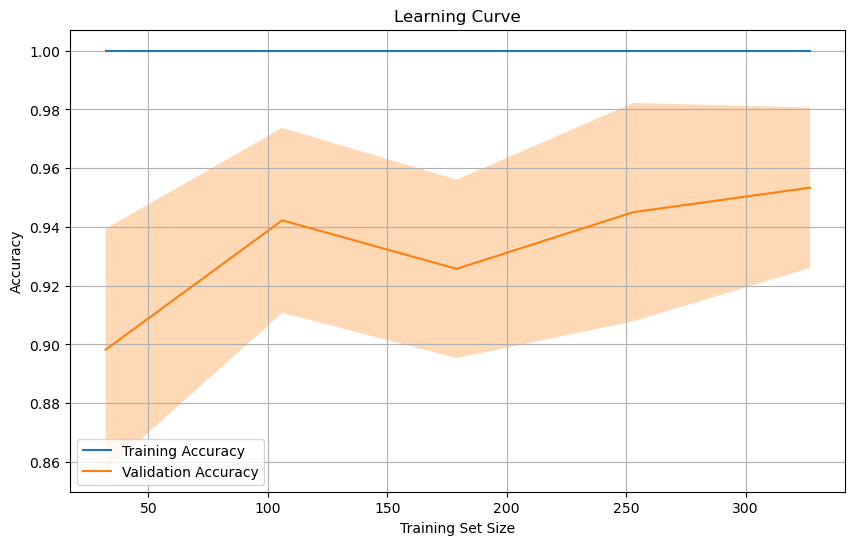

In [65]:
plot_learning_curve(rs_rf_pca.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

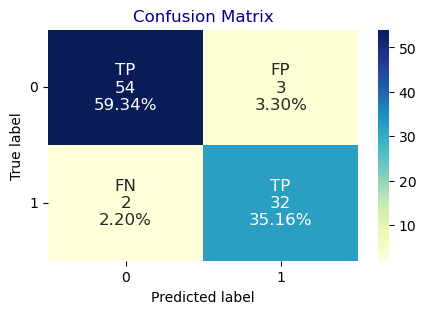

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9643    0.9474    0.9558        57
   Malignant     0.9143    0.9412    0.9275        34

    accuracy                         0.9451        91
   macro avg     0.9393    0.9443    0.9416        91
weighted avg     0.9456    0.9451    0.9452        91

{'model': 'Random Forest with PCA', 'best_params': {'rf__n_estimators': 600, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 2, 'rf__max_features': 'log2', 'rf__max_depth': None, 'rf__criterion': 'entropy', 'rf__bootstrap': False}, 'best_cross_val_score': 0.9561561561561561, 'train_accuracy': 1.0, 'test_accuracy': 0.945054945054945, 'Precision': 0.9142857142857143, 'Recall': 0.9411764705882353, 'F1-Score': 0.9275362318840579, 'AUC': 0.9938080495356038}


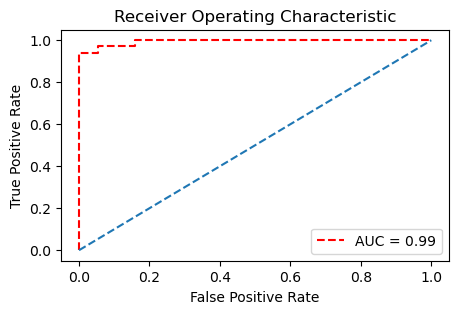

In [66]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_rf_pca, "Random Forest with PCA", X_val, y_val, classes=["Benign", "Malignant"], results=results)

## Adaboost
### Base RF without Base Estimator

In [67]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

ada = AdaBoostClassifier(random_state=1)

param_grid_ada = {
    'ada__n_estimators': list(range(50, 1001, 50)),
    'ada__learning_rate': [10, 1, 0.1, 0.01, 0.001, 0.0001],
#     'ada__base_estimator': [RandomForestClassifier(), LogisticRegression(), SVC()],
    'ada__algorithm': ['SAMME.R', 'SAMME']
}


pipe_ada = Pipeline(steps=[('preprocessor', preprocessor),
                            ('ada', ada)])

rs_ada = RandomizedSearchCV(estimator=pipe_ada, 
                           param_distributions=param_grid_ada, 
                           cv=10, 
                           n_iter=30, 
                           scoring="accuracy", 
                           n_jobs=-1, 
                           verbose=1,
                           random_state=1)
                              
# rs_ada = GridSearchCV(estimator=pipe_ada,
#                       param_grid=param_grid_ada,
#                       scoring='accuracy',
#                       cv=10,
#                       n_jobs=-1,
#                       verbose=1)

rs_ada.fit(X_train_val, y_train_val)

# Print the best hyperparameter settinrs and the corresponding mean cross-validated accuracy score
print("Best ada hyperparameters:", rs_ada.best_params_)
print("Best ada accuracy:", rs_ada.best_score_)

# evaluate model on train_val set
print("ada train accuracy:", rs_ada.score(X_train_val, y_train_val))

# evaluate model on val set
print("ada test accuracy:", rs_ada.score(X_val, y_val))

Fitting 10 folds for each of 30 candidates, totalling 300 fits
Best ada hyperparameters: {'ada__n_estimators': 750, 'ada__learning_rate': 1, 'ada__algorithm': 'SAMME.R'}
Best ada accuracy: 0.978003003003003
ada train accuracy: 1.0
ada test accuracy: 0.989010989010989


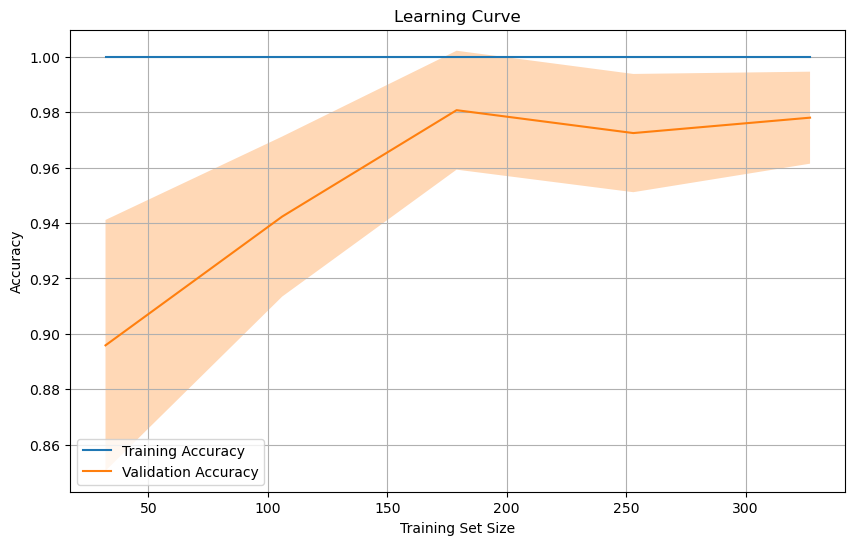

In [68]:
plot_learning_curve(rs_ada.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

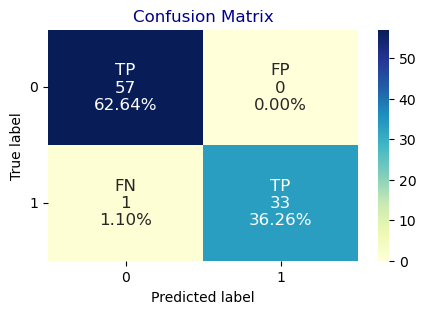

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9828    1.0000    0.9913        57
   Malignant     1.0000    0.9706    0.9851        34

    accuracy                         0.9890        91
   macro avg     0.9914    0.9853    0.9882        91
weighted avg     0.9892    0.9890    0.9890        91

{'model': 'Base Adaboost', 'best_params': {'ada__n_estimators': 750, 'ada__learning_rate': 1, 'ada__algorithm': 'SAMME.R'}, 'best_cross_val_score': 0.978003003003003, 'train_accuracy': 1.0, 'test_accuracy': 0.989010989010989, 'Precision': 1.0, 'Recall': 0.9705882352941176, 'F1-Score': 0.9850746268656716, 'AUC': 0.9963880288957689}


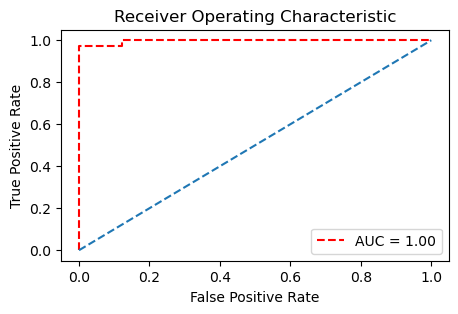

In [70]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_ada, "Base Adaboost", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### Base Adaboost with Base Estimator

base estimator: Random Forest, 

In [73]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

ada = AdaBoostClassifier(random_state=1)

best_logreg_params = {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
best_svc_params = {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
# best_knn_params = {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


param_grid_ada = {
    'ada__n_estimators': list(range(50, 1001, 50)),
    'ada__learning_rate': [10, 1, 0.1, 0.01, 0.001, 0.0001],
    'ada__base_estimator': [DecisionTreeClassifier(), LogisticRegression(**best_logreg_params), SVC(**best_svc_params)],
    'ada__algorithm': ['SAMME.R', 'SAMME']
}


pipe_ada = Pipeline(steps=[('preprocessor', preprocessor),
                            ('ada', ada)])

rs_ada_basest = RandomizedSearchCV(estimator=pipe_ada, 
                           param_distributions=param_grid_ada, 
                           cv=10, 
                           n_iter=40, 
                           scoring="accuracy", 
                           n_jobs=-1, 
                           verbose=1,
                           random_state=1)
                              
# rs_ada_basest = GridSearchCV(estimator=pipe_ada,
#                       param_grid=param_grid_ada,
#                       scoring='accuracy',
#                       cv=10,
#                       n_jobs=-1,
#                       verbose=1)

rs_ada_basest.fit(X_train_val, y_train_val)

# Print the best hyperparameter settinrs and the corresponding mean cross-validated accuracy score
print("Best ada hyperparameters:", rs_ada_basest.best_params_)
print("Best ada accuracy:", rs_ada_basest.best_score_)

# evaluate model on train_val set
print("ada train accuracy:", rs_ada_basest.score(X_train_val, y_train_val))

# evaluate model on val set
print("ada test accuracy:", rs_ada_basest.score(X_val, y_val))

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\

Best ada hyperparameters: {'ada__n_estimators': 100, 'ada__learning_rate': 0.1, 'ada__base_estimator': LogisticRegression(C=100, penalty='l1', solver='saga'), 'ada__algorithm': 'SAMME.R'}
Best ada accuracy: 0.956006006006006
ada train accuracy: 0.9532967032967034
ada test accuracy: 0.978021978021978


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\

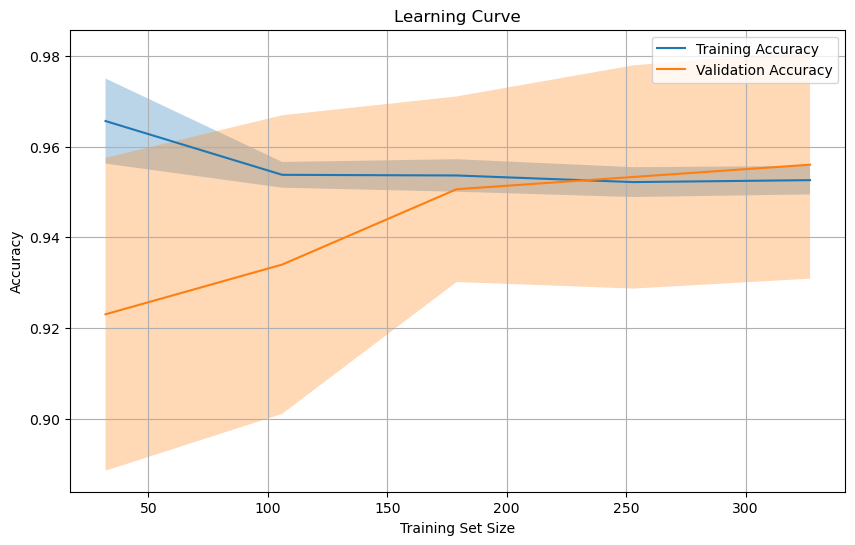

In [74]:
plot_learning_curve(rs_ada_basest.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

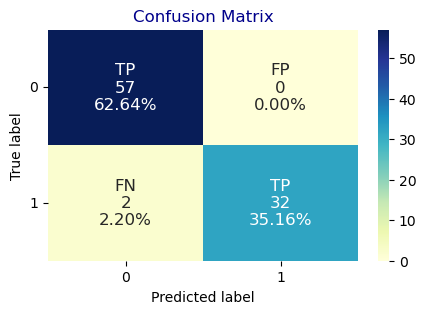

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9661    1.0000    0.9828        57
   Malignant     1.0000    0.9412    0.9697        34

    accuracy                         0.9780        91
   macro avg     0.9831    0.9706    0.9762        91
weighted avg     0.9788    0.9780    0.9779        91

{'model': 'Base Adaboost with Estimator', 'best_params': {'ada__n_estimators': 100, 'ada__learning_rate': 0.1, 'ada__base_estimator': LogisticRegression(C=100, penalty='l1', solver='saga'), 'ada__algorithm': 'SAMME.R'}, 'best_cross_val_score': 0.956006006006006, 'train_accuracy': 0.9532967032967034, 'test_accuracy': 0.978021978021978, 'Precision': 1.0, 'Recall': 0.9411764705882353, 'F1-Score': 0.9696969696969697, 'AUC': 0.980908152734778}


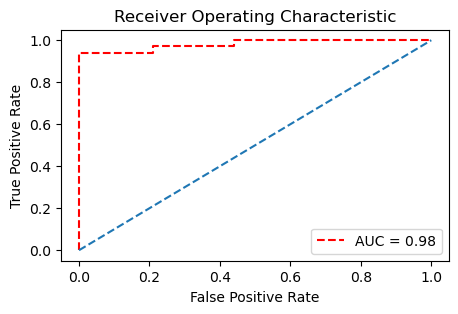

In [75]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_ada_basest, "Base Adaboost with Estimator", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### Adaboost with Base Estimator and Transformer

In [76]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ("transformer", PowerTransformer(method="yeo-johnson")),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

ada = AdaBoostClassifier(random_state=1)

best_logreg_params = {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
best_svc_params = {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
# best_knn_params = {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


param_grid_ada = {
    'ada__n_estimators': list(range(50, 1001, 50)),
    'ada__learning_rate': [10, 1, 0.1, 0.01, 0.001, 0.0001],
    'ada__base_estimator': [DecisionTreeClassifier(), LogisticRegression(**best_logreg_params), SVC(**best_svc_params)],
    'ada__algorithm': ['SAMME.R', 'SAMME']
}


pipe_ada = Pipeline(steps=[('preprocessor', preprocessor),
                            ('ada', ada)])

rs_ada_basest_tf = RandomizedSearchCV(estimator=pipe_ada, 
                           param_distributions=param_grid_ada, 
                           cv=10, 
                           n_iter=40, 
                           scoring="accuracy", 
                           n_jobs=-1, 
                           verbose=1,
                           random_state=1)
                              
# rs_ada_basest_tf = GridSearchCV(estimator=pipe_ada,
#                       param_grid=param_grid_ada,
#                       scoring='accuracy',
#                       cv=10,
#                       n_jobs=-1,
#                       verbose=1)

rs_ada_basest_tf.fit(X_train_val, y_train_val)

# Print the best hyperparameter settinrs and the corresponding mean cross-validated accuracy score
print("Best ada hyperparameters:", rs_ada_basest_tf.best_params_)
print("Best ada accuracy:", rs_ada_basest_tf.best_score_)

# evaluate model on train_val set
print("ada train accuracy:", rs_ada_basest_tf.score(X_train_val, y_train_val))

# evaluate model on val set
print("ada test accuracy:", rs_ada_basest_tf.score(X_val, y_val))

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\

Best ada hyperparameters: {'ada__n_estimators': 500, 'ada__learning_rate': 1, 'ada__base_estimator': LogisticRegression(C=100, penalty='l1', solver='saga'), 'ada__algorithm': 'SAMME'}
Best ada accuracy: 0.9452702702702703
ada train accuracy: 0.9642857142857143
ada test accuracy: 0.9560439560439561


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\

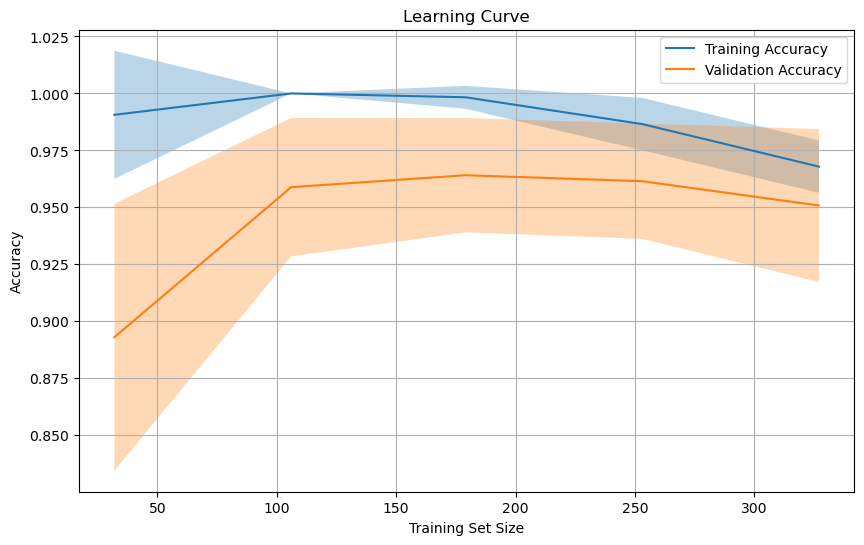

In [77]:
plot_learning_curve(rs_ada_basest_tf.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

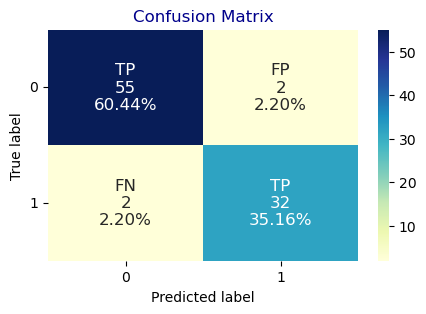

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9649    0.9649    0.9649        57
   Malignant     0.9412    0.9412    0.9412        34

    accuracy                         0.9560        91
   macro avg     0.9530    0.9530    0.9530        91
weighted avg     0.9560    0.9560    0.9560        91

{'model': 'Adaboost with Base Estimator & Transformer', 'best_params': {'ada__n_estimators': 500, 'ada__learning_rate': 1, 'ada__base_estimator': LogisticRegression(C=100, penalty='l1', solver='saga'), 'ada__algorithm': 'SAMME'}, 'best_cross_val_score': 0.9452702702702703, 'train_accuracy': 0.9642857142857143, 'test_accuracy': 0.9560439560439561, 'Precision': 0.9411764705882353, 'Recall': 0.9411764705882353, 'F1-Score': 0.9411764705882353, 'AUC': 0.9932920536635708}


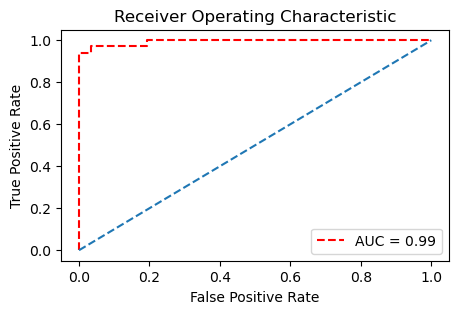

In [78]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_ada_basest_tf, "Adaboost with Base Estimator & Transformer", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### Adaboost with Base Estimator and PCA

In [79]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ("transformer", PowerTransformer(method="yeo-johnson")),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

ada = AdaBoostClassifier(random_state=1)

best_logreg_params = {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
best_svc_params = {'C': 1, 'gamma': 0.001, 'kernel': 'linear'}
# best_knn_params = {'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


param_grid_ada = {
    'ada__n_estimators': list(range(50, 1001, 50)),
    'ada__learning_rate': [10, 1, 0.1, 0.01, 0.001, 0.0001],
    'ada__base_estimator': [DecisionTreeClassifier(), LogisticRegression(**best_logreg_params), SVC(**best_svc_params)],
    'ada__algorithm': ['SAMME.R', 'SAMME']
}


pipe_ada = Pipeline(steps=[('preprocessor', preprocessor),
                            ('ada', ada)])

rs_ada_basest_pca = RandomizedSearchCV(estimator=pipe_ada, 
                           param_distributions=param_grid_ada, 
                           cv=10, 
                           n_iter=40, 
                           scoring="accuracy", 
                           n_jobs=-1, 
                           verbose=1,
                           random_state=1)
                              
# rs_ada_basest_pca = GridSearchCV(estimator=pipe_ada,
#                       param_grid=param_grid_ada,
#                       scoring='accuracy',
#                       cv=10,
#                       n_jobs=-1,
#                       verbose=1)

rs_ada_basest_pca.fit(X_train_val, y_train_val)

# Print the best hyperparameter settinrs and the corresponding mean cross-validated accuracy score
print("Best ada hyperparameters:", rs_ada_basest_pca.best_params_)
print("Best ada accuracy:", rs_ada_basest_pca.best_score_)

# evaluate model on train_val set
print("ada train accuracy:", rs_ada_basest_pca.score(X_train_val, y_train_val))

# evaluate model on val set
print("ada test accuracy:", rs_ada_basest_pca.score(X_val, y_val))

Fitting 10 folds for each of 40 candidates, totalling 400 fits


C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\pipeline.py", line 382, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\ensemble\_weight_boosting.py", line

C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\ml_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\fahmi\anaconda3\envs\

Best ada hyperparameters: {'ada__n_estimators': 100, 'ada__learning_rate': 0.1, 'ada__base_estimator': LogisticRegression(C=100, penalty='l1', solver='saga'), 'ada__algorithm': 'SAMME.R'}
Best ada accuracy: 0.9668918918918917
ada train accuracy: 0.978021978021978
ada test accuracy: 0.945054945054945


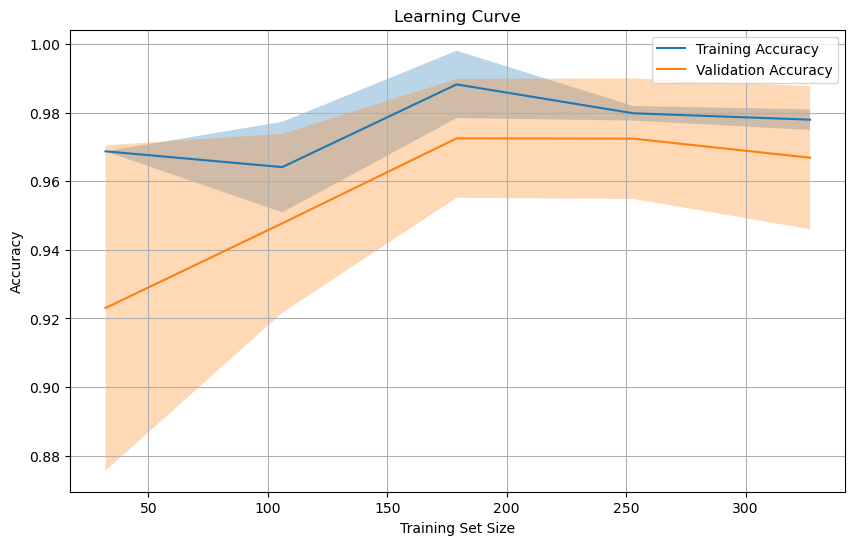

In [80]:
plot_learning_curve(rs_ada_basest_pca.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

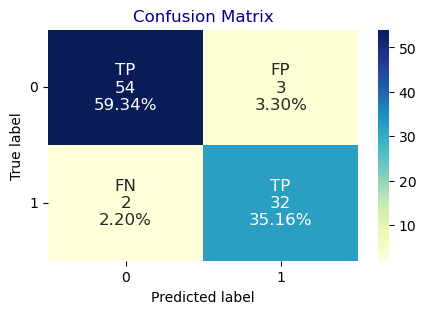

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9643    0.9474    0.9558        57
   Malignant     0.9143    0.9412    0.9275        34

    accuracy                         0.9451        91
   macro avg     0.9393    0.9443    0.9416        91
weighted avg     0.9456    0.9451    0.9452        91

{'model': 'Adaboost with Base Estimator & PCA', 'best_params': {'ada__n_estimators': 100, 'ada__learning_rate': 0.1, 'ada__base_estimator': LogisticRegression(C=100, penalty='l1', solver='saga'), 'ada__algorithm': 'SAMME.R'}, 'best_cross_val_score': 0.9668918918918917, 'train_accuracy': 0.978021978021978, 'test_accuracy': 0.945054945054945, 'Precision': 0.9142857142857143, 'Recall': 0.9411764705882353, 'F1-Score': 0.9275362318840579, 'AUC': 0.9922600619195047}


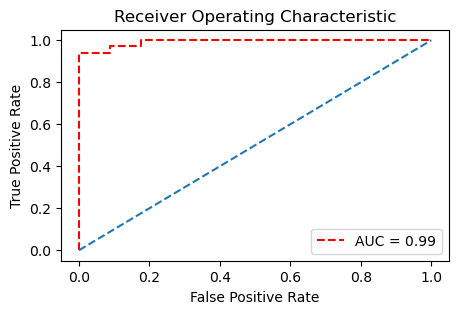

In [81]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_ada_basest_pca, "Adaboost with Base Estimator & PCA", X_val, y_val, classes=["Benign", "Malignant"], results=results)

## Light GBM
### Base Light GBM

In [82]:
import lightgbm as lgb

In [83]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

lgbm = lgb.LGBMClassifier(random_state=1)

param_grid_lgbm = {
    'lgbm__learning_rate': [0.05, 0.01, 0.15, 0.1],
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__n_estimators': [50, 100, 200, 300, 500],
    'lgbm__num_leaves': [20, 30, 40]
}

pipe_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                            ('lgbm', lgbm)])

rs_lgbm = RandomizedSearchCV(estimator=pipe_lgbm,
                             param_distributions=param_grid_lgbm,
                             scoring='accuracy',
                             cv=40,
                             n_jobs=-1,
                             verbose=1)

rs_lgbm.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best LightGBM hyperparameters:", rs_lgbm.best_params_)
print("Best LightGBM accuracy:", rs_lgbm.best_score_)

# Evaluate model on train_val set
print("LightGBM train accuracy:", rs_lgbm.score(X_train_val, y_train_val))

# Evaluate model on val set
print("LightGBM test accuracy:", rs_lgbm.score(X_val, y_val))


Fitting 40 folds for each of 10 candidates, totalling 400 fits
Best LightGBM hyperparameters: {'lgbm__num_leaves': 20, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.1}
Best LightGBM accuracy: 0.9669444444444444
LightGBM train accuracy: 1.0
LightGBM test accuracy: 0.967032967032967


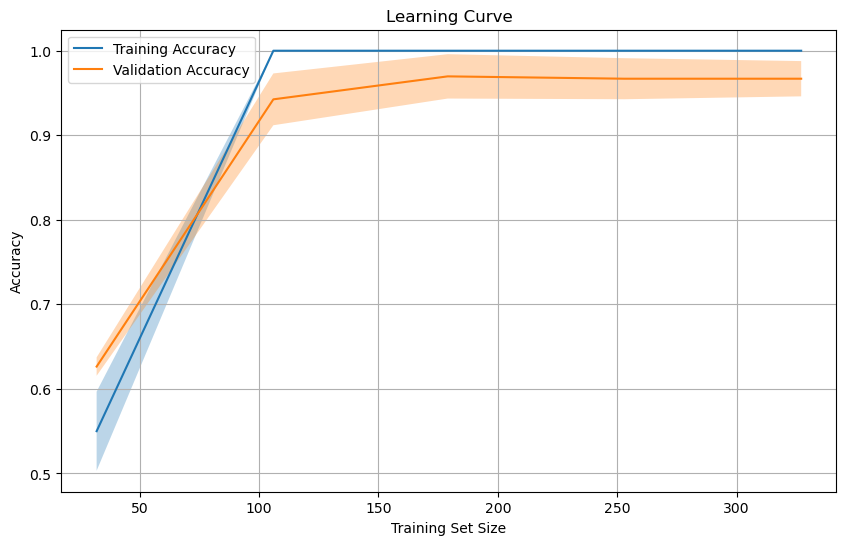

In [84]:
plot_learning_curve(rs_lgbm.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

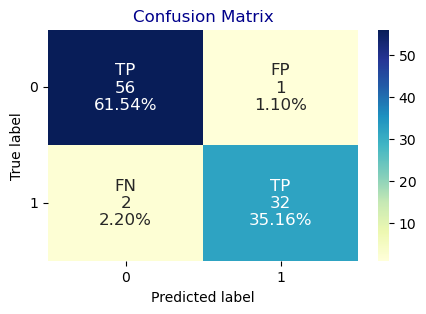

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9655    0.9825    0.9739        57
   Malignant     0.9697    0.9412    0.9552        34

    accuracy                         0.9670        91
   macro avg     0.9676    0.9618    0.9646        91
weighted avg     0.9671    0.9670    0.9669        91

{'model': 'Base LGBM', 'best_params': {'lgbm__num_leaves': 20, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.1}, 'best_cross_val_score': 0.9669444444444444, 'train_accuracy': 1.0, 'test_accuracy': 0.967032967032967, 'Precision': 0.9696969696969697, 'Recall': 0.9411764705882353, 'F1-Score': 0.955223880597015, 'AUC': 0.9932920536635708}


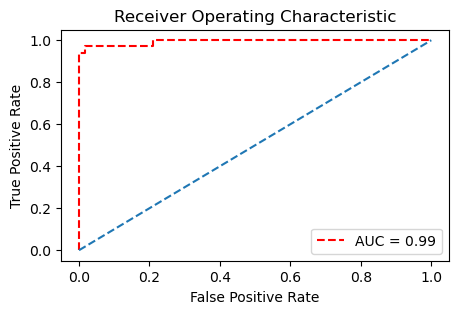

In [85]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_lgbm, "Base LGBM", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### Light GBM with Transformer

In [86]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer()),
    ('scaler', MinMaxScaler())
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

lgbm = lgb.LGBMClassifier(random_state=1)

param_grid_lgbm = {
    'lgbm__learning_rate': [0.05, 0.01, 0.15, 0.1],
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__n_estimators': [50, 100, 200, 300, 500],
    'lgbm__num_leaves': [20, 30, 40]
}

pipe_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                            ('lgbm', lgbm)])

rs_lgbm_tf = RandomizedSearchCV(estimator=pipe_lgbm,
                             param_distributions=param_grid_lgbm,
                             scoring='accuracy',
                             cv=40,
                             n_jobs=-1,
                             verbose=1)

rs_lgbm_tf.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best LightGBM hyperparameters:", rs_lgbm_tf.best_params_)
print("Best LightGBM accuracy:", rs_lgbm_tf.best_score_)

# Evaluate model on train_val set
print("LightGBM train accuracy:", rs_lgbm_tf.score(X_train_val, y_train_val))

# Evaluate model on val set
print("LightGBM test accuracy:", rs_lgbm_tf.score(X_val, y_val))


Fitting 40 folds for each of 10 candidates, totalling 400 fits
Best LightGBM hyperparameters: {'lgbm__num_leaves': 30, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.1}
Best LightGBM accuracy: 0.9697222222222223
LightGBM train accuracy: 1.0
LightGBM test accuracy: 0.967032967032967


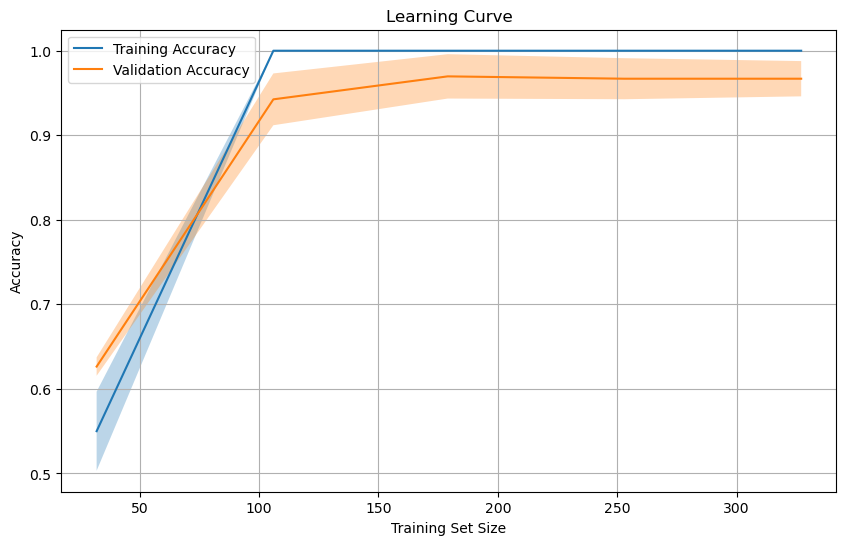

In [87]:
plot_learning_curve(rs_lgbm_tf.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

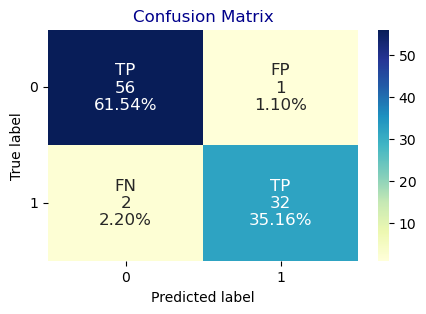

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9655    0.9825    0.9739        57
   Malignant     0.9697    0.9412    0.9552        34

    accuracy                         0.9670        91
   macro avg     0.9676    0.9618    0.9646        91
weighted avg     0.9671    0.9670    0.9669        91

{'model': 'LGBM with Transformer', 'best_params': {'lgbm__num_leaves': 30, 'lgbm__n_estimators': 200, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.1}, 'best_cross_val_score': 0.9697222222222223, 'train_accuracy': 1.0, 'test_accuracy': 0.967032967032967, 'Precision': 0.9696969696969697, 'Recall': 0.9411764705882353, 'F1-Score': 0.955223880597015, 'AUC': 0.9932920536635708}


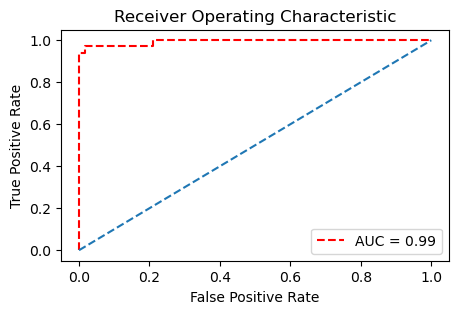

In [88]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_lgbm_tf, "LGBM with Transformer", X_val, y_val, classes=["Benign", "Malignant"], results=results)

### Light GBM with PCA

In [89]:
numeric_features = list(range(30))
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('transformer', PowerTransformer()),
    ('scaler', MinMaxScaler()),
    ('pca', PCA(n_components=0.95))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features)
])

lgbm = lgb.LGBMClassifier(random_state=1)

param_grid_lgbm = {
    'lgbm__learning_rate': [0.05, 0.01, 0.15, 0.1],
    'lgbm__max_depth': [3, 5, 7],
    'lgbm__n_estimators': [50, 100, 200, 300, 500],
    'lgbm__num_leaves': [20, 30, 40]
}

pipe_lgbm = Pipeline(steps=[('preprocessor', preprocessor),
                            ('lgbm', lgbm)])

rs_lgbm_pca = RandomizedSearchCV(estimator=pipe_lgbm,
                             param_distributions=param_grid_lgbm,
                             scoring='accuracy',
                             cv=40,
                             n_jobs=-1,
                             verbose=1)

rs_lgbm_pca.fit(X_train_val, y_train_val)

# Print the best hyperparameter settings and the corresponding mean cross-validated accuracy score
print("Best LightGBM hyperparameters:", rs_lgbm_pca.best_params_)
print("Best LightGBM accuracy:", rs_lgbm_pca.best_score_)

# Evaluate model on train_val set
print("LightGBM train accuracy:", rs_lgbm_pca.score(X_train_val, y_train_val))

# Evaluate model on val set
print("LightGBM test accuracy:", rs_lgbm_pca.score(X_val, y_val))

Fitting 40 folds for each of 10 candidates, totalling 400 fits
Best LightGBM hyperparameters: {'lgbm__num_leaves': 40, 'lgbm__n_estimators': 100, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.1}
Best LightGBM accuracy: 0.9641666666666666
LightGBM train accuracy: 1.0
LightGBM test accuracy: 0.967032967032967


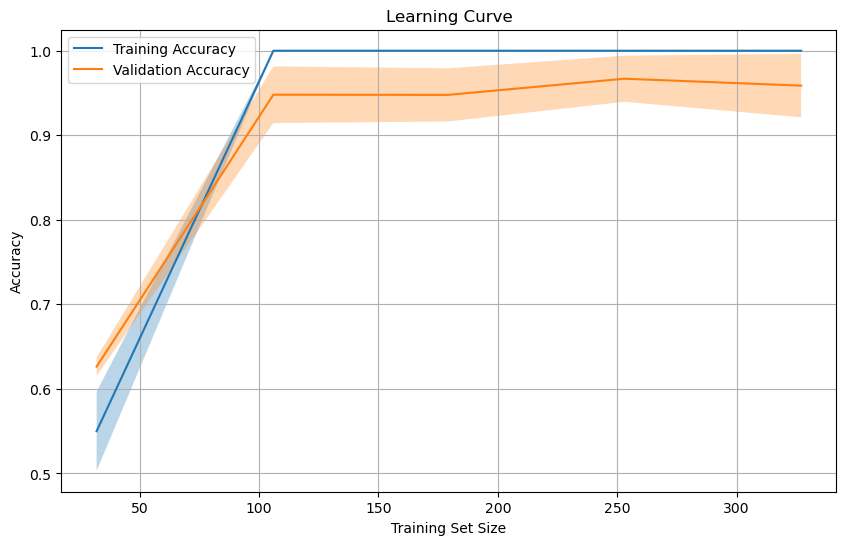

In [90]:
plot_learning_curve(rs_lgbm_pca.best_estimator_, X_train_val, y_train_val, cv=10, scoring='accuracy')

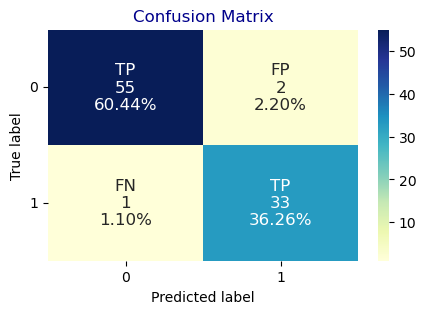

Classification Report:
              precision    recall  f1-score   support

      Benign     0.9821    0.9649    0.9735        57
   Malignant     0.9429    0.9706    0.9565        34

    accuracy                         0.9670        91
   macro avg     0.9625    0.9678    0.9650        91
weighted avg     0.9675    0.9670    0.9671        91

{'model': 'LGBM with PCA', 'best_params': {'lgbm__num_leaves': 40, 'lgbm__n_estimators': 100, 'lgbm__max_depth': 7, 'lgbm__learning_rate': 0.1}, 'best_cross_val_score': 0.9641666666666666, 'train_accuracy': 1.0, 'test_accuracy': 0.967032967032967, 'Precision': 0.9428571428571428, 'Recall': 0.9705882352941176, 'F1-Score': 0.9565217391304348, 'AUC': 0.9969040247678018}


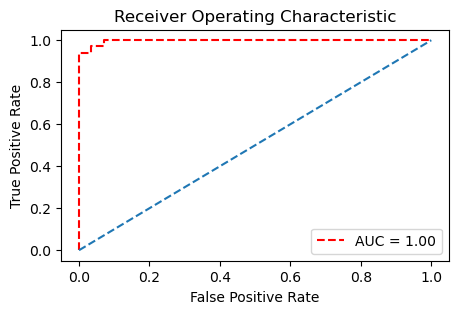

In [91]:
# model, model_name, X, y, classes=None
ml_evaluation(rs_lgbm_pca, "LGBM with PCA", X_val, y_val, classes=["Benign", "Malignant"], results=results)

# Model Comparison on Validation Set

In [92]:
compare_model = pd.DataFrame(results)
compare_model.sort_values(by="AUC", ascending=False).reset_index(drop=True)

,model,best_params,best_cross_val_score,train_accuracy,test_accuracy,Precision,Recall,F1-Score,AUC
0,LGBM with PCA,"{'lgbm__num_leaves': 40, 'lgbm__n_estimators':...",0.964167,1.000000,0.967033,0.942857,0.970588,0.956522,0.996904
1,Base Adaboost,"{'ada__n_estimators': 750, 'ada__learning_rate...",0.978003,1.000000,0.989011,1.000000,0.970588,0.985075,0.996388
2,SVC with Transformer,"{'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': ...",0.986186,0.991758,0.978022,1.000000,0.941176,0.969697,0.995872
3,SVC with PCA,"{'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': ...",0.972523,0.991758,0.978022,1.000000,0.941176,0.969697,0.994840
4,Base Logreg,"{'logreg__C': 100, 'logreg__penalty': 'l1', 'l...",0.978003,0.983516,0.956044,0.941176,0.941176,0.941176,0.994324
5,KNN with Transformer,"{'knn__n_neighbors': 9, 'knn__p': 1, 'knn__wei...",0.961336,0.964286,0.967033,0.969697,0.941176,0.955224,0.994324
6,Random Forest with PCA,"{'rf__n_estimators': 600, 'rf__min_samples_spl...",0.956156,1.000000,0.945055,0.914286,0.941176,0.927536,0.993808
7,Base KNN,"{'knn__n_neighbors': 5, 'knn__p': 2, 'knn__wei...",0.969745,0.980769,0.978022,1.000000,0.941176,0.969697,0.993808
8,LGBM with Transformer,"{'lgbm__num_leaves': 30, 'lgbm__n_estimators':...",0.969722,1.000000,0.967033,0.969697,0.941176,0.955224,0.993292
9,Base LGBM,"{'lgbm__num_leaves': 20, 'lgbm__n_estimators':...",0.966944,1.000000,0.967033,0.969697,0.941176,0.955224,0.993292


In [93]:
compare_model[compare_model["model"].str.contains("Base")].sort_values(by="AUC", ascending=False).reset_index(drop=True)

,model,best_params,best_cross_val_score,train_accuracy,test_accuracy,Precision,Recall,F1-Score,AUC
0,Base Adaboost,"{'ada__n_estimators': 750, 'ada__learning_rate...",0.978003,1.000000,0.989011,1.000000,0.970588,0.985075,0.996388
1,Base Logreg,"{'logreg__C': 100, 'logreg__penalty': 'l1', 'l...",0.978003,0.983516,0.956044,0.941176,0.941176,0.941176,0.994324
2,Base KNN,"{'knn__n_neighbors': 5, 'knn__p': 2, 'knn__wei...",0.969745,0.980769,0.978022,1.000000,0.941176,0.969697,0.993808
3,Adaboost with Base Estimator & Transformer,"{'ada__n_estimators': 500, 'ada__learning_rate...",0.945270,0.964286,0.956044,0.941176,0.941176,0.941176,0.993292
4,Base LGBM,"{'lgbm__num_leaves': 20, 'lgbm__n_estimators':...",0.966944,1.000000,0.967033,0.969697,0.941176,0.955224,0.993292
5,Base Random Forest,"{'rf__n_estimators': 550, 'rf__min_samples_spl...",0.956081,0.997253,0.967033,0.969697,0.941176,0.955224,0.993292
6,Adaboost with Base Estimator & PCA,"{'ada__n_estimators': 100, 'ada__learning_rate...",0.966892,0.978022,0.945055,0.914286,0.941176,0.927536,0.992260
7,Base SVC,"{'svm__C': 1, 'svm__gamma': 0.001, 'svm__kerne...",0.978078,0.980769,0.978022,1.000000,0.941176,0.969697,0.986068
8,Base Adaboost with Estimator,"{'ada__n_estimators': 100, 'ada__learning_rate...",0.956006,0.953297,0.978022,1.000000,0.941176,0.969697,0.980908
9,Base Decision Tree,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.956081,0.978022,0.934066,0.888889,0.941176,0.914286,0.965428


In [94]:
compare_model[compare_model["model"].str.contains("Transformer")].sort_values(by="AUC", ascending=False).reset_index(drop=True)

,model,best_params,best_cross_val_score,train_accuracy,test_accuracy,Precision,Recall,F1-Score,AUC
0,SVC with Transformer,"{'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': ...",0.986186,0.991758,0.978022,1.000000,0.941176,0.969697,0.995872
1,KNN with Transformer,"{'knn__n_neighbors': 9, 'knn__p': 1, 'knn__wei...",0.961336,0.964286,0.967033,0.969697,0.941176,0.955224,0.994324
2,Adaboost with Base Estimator & Transformer,"{'ada__n_estimators': 500, 'ada__learning_rate...",0.945270,0.964286,0.956044,0.941176,0.941176,0.941176,0.993292
3,LGBM with Transformer,"{'lgbm__num_leaves': 30, 'lgbm__n_estimators':...",0.969722,1.000000,0.967033,0.969697,0.941176,0.955224,0.993292
4,Random Forest with Transformer,"{'rf__n_estimators': 1000, 'rf__min_samples_sp...",0.958859,1.000000,0.967033,0.969697,0.941176,0.955224,0.992776
5,Logreg with Transformer,"{'logreg__C': 10, 'logreg__penalty': 'l1', 'lo...",0.978003,0.989011,0.956044,0.941176,0.941176,0.941176,0.992260
6,Decision Tree with Transformer,"{'dt__criterion': 'entropy', 'dt__max_depth': ...",0.956081,0.978022,0.923077,0.864865,0.941176,0.901408,0.964396


In [95]:
compare_model[compare_model["model"].str.contains("PCA")].sort_values(by="AUC", ascending=False).reset_index(drop=True)

,model,best_params,best_cross_val_score,train_accuracy,test_accuracy,Precision,Recall,F1-Score,AUC
0,LGBM with PCA,"{'lgbm__num_leaves': 40, 'lgbm__n_estimators':...",0.964167,1.000000,0.967033,0.942857,0.970588,0.956522,0.996904
1,SVC with PCA,"{'svm__C': 1, 'svm__gamma': 1, 'svm__kernel': ...",0.972523,0.991758,0.978022,1.000000,0.941176,0.969697,0.994840
2,Random Forest with PCA,"{'rf__n_estimators': 600, 'rf__min_samples_spl...",0.956156,1.000000,0.945055,0.914286,0.941176,0.927536,0.993808
3,Adaboost with Base Estimator & PCA,"{'ada__n_estimators': 100, 'ada__learning_rate...",0.966892,0.978022,0.945055,0.914286,0.941176,0.927536,0.992260
4,KNN with PCA,"{'knn__n_neighbors': 15, 'knn__p': 1, 'knn__we...",0.969670,1.000000,0.967033,0.969697,0.941176,0.955224,0.992260
5,Logreg with PCA,"{'logreg__C': 1, 'logreg__penalty': 'l1', 'log...",0.972447,0.975275,0.945055,0.914286,0.941176,0.927536,0.990196
6,Decision Tree with PCA,"{'dt__criterion': 'gini', 'dt__max_depth': 5, ...",0.936937,0.983516,0.923077,0.909091,0.882353,0.895522,0.874871
